# Credit Card Fraud Detection Project
### Importing Libraries

In [295]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC  
from xgboost import XGBClassifier

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix,make_scorer,recall_score,precision_recall_curve,auc,roc_curve,roc_auc_score,classification_report
from sklearn.metrics import confusion_matrix , classification_report
from mlxtend.plotting import plot_confusion_matrix

import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.tools as tls

pd.set_option('display.max_columns', 25)


import warnings
warnings.filterwarnings("ignore")


In [297]:
# def plot_pr_curve(y_test, model_probs):
# # calculate the no skill line as the proportion of the positive class
# no_skill = len(y_test[y_test==1]) / len(y_test)
# 	# plot the no skill precision-recall curve
# 	plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
# 	# plot model precision-recall curve
# 	precision, recall, _ = precision_recall_curve(y_test, model_probs)
# 	plt.plot(recall, precision, marker='.', label='Logistic')
# 	# axis labels
# 	plt.xlabel('Recall')
# 	plt.ylabel('Precision')
# 	# show the legend
# 	plt.legend()
# 	# show the plot
# 	plt.show()

In [2]:
df=pd.read_csv('creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,...,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,...,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,...,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,...,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,...,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
print("Credit Card Fraud Detection data -  rows:",df.shape[0]," columns:", df.shape[1])

Credit Card Fraud Detection data -  rows: 284807  columns: 31


In [5]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

# Exploratory Data Analysis
## Checking the Data
### 1- Dropping Duplicates and Missing Data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
df.drop_duplicates(inplace = True)

In [8]:
missing_values_count = df.isnull().sum()
print (missing_values_count[0:10])
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()
print ("% of missing data = ",(total_missing/total_cells) * 100)

Time    0
V1      0
V2      0
V3      0
V4      0
V5      0
V6      0
V7      0
V8      0
V9      0
dtype: int64
% of missing data =  0.0


In [9]:
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,Time,V16,Amount,V28,V27,V26,V25,V24,V23,V22,V21,V20,...,V12,V11,V10,V9,V8,V7,V6,V5,V4,V3,V2,Class
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     28

In [11]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,-0.001441,0.000202,...,-0.000264,0.000187,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,1.076407,1.018720,...,0.813379,0.769984,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,-4.797473,...,-7.213527,-54.497720,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,-0.535578,-0.761649,...,-0.456289,-0.211469,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,-0.093237,-0.032306,...,0.003367,-0.062353,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,0.453619,0.739579,...,0.458508,0.133207,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,23.745136,12.018913,...,5.591971,39.420904,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


### 2- Imbalanced Data

In [12]:
df['Class'].value_counts()

0    283253
1       473
Name: Class, dtype: int64

In [ ]:
x = df['Class'].value_counts().index
y = df['Class'].value_counts().values

trace2 = go.Bar(
     x=x ,
     y=y,
     marker=dict(
         color=y,
         colorscale = 'Viridis',
         reversescale = True
     ),
     name="Imbalance",    
 )
layout = dict(
     title="Data imbalance - isFraud",
     width = 600, height = 700,
     xaxis=go.layout.XAxis(
     automargin=True),
     yaxis=dict(
         showgrid=False,
         showline=False,
         showticklabels=True,
         #domain=[0, 0.85],
     ), 
)
fig1 = go.Figure(data=[trace2], layout=layout)
iplot(fig1)

In [16]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

## Data Exploration (Explanation)
### Transactions in time

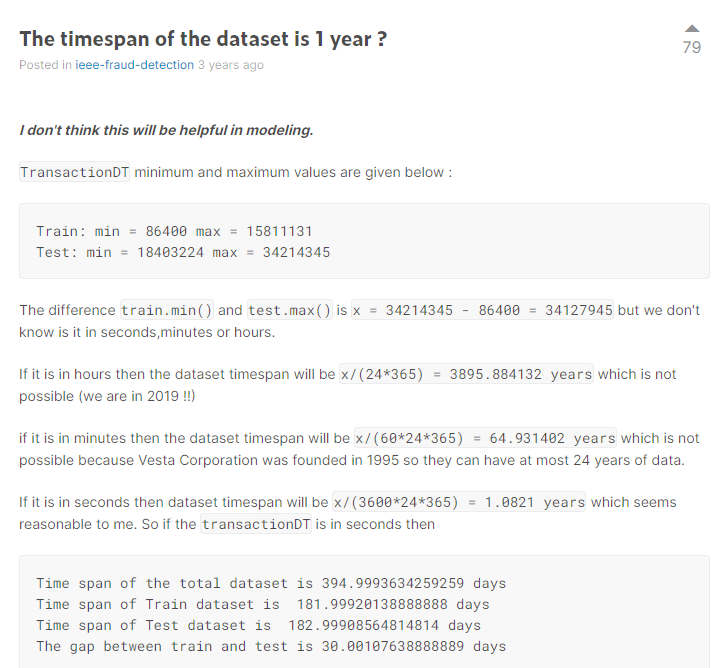

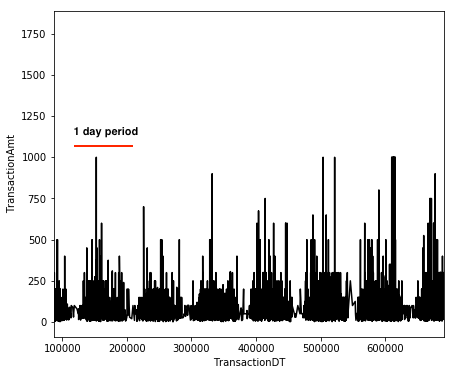

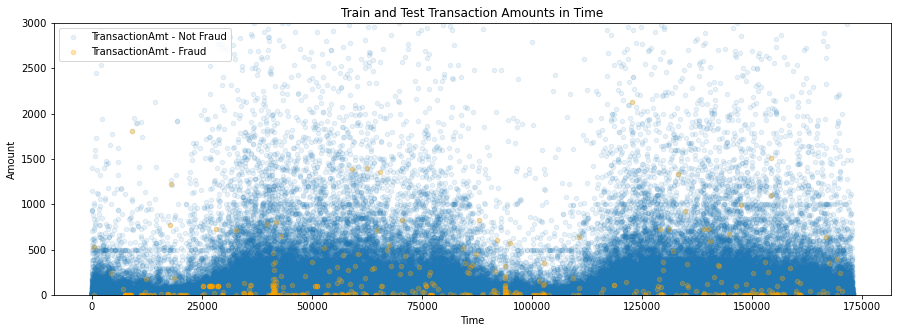

In [18]:
ax = df.plot(x='Time',
                       y='Amount',
                       kind='scatter',
                       alpha=0.1,
                       label='TransactionAmt - Not Fraud',
                       title='Transaction Amounts by Time',
                       ylim=(0, 3000),
                       figsize=(15, 5))
df.loc[df['Class'] == 1] \
    .plot(x='Time',
         y='Amount',
         kind='scatter',
         alpha=0.3,
         label='TransactionAmt - Fraud',
         title='Train and Test Transaction Amounts in Time',
         ylim=(0, 3000),
         color='orange',
         figsize=(15, 5),
         ax=ax)
plt.show()

In [19]:
class_0 = df.loc[df['Class'] == 0]["Time"]
class_1 = df.loc[df['Class'] == 1]["Time"]

hist_data = [class_0, class_1]
group_labels = ['Not Fraud', 'Fraud']

fig = ff.create_distplot(hist_data, group_labels, show_hist=False, show_rug=False)
fig['layout'].update(title='Credit Card Transactions Time Density Plot', xaxis=dict(title='Time [s]'))
iplot(fig, filename='dist_only')

In [20]:
df['Hour'] = df['Time'].apply(lambda x: np.floor(x / 3600))

tmp = df.groupby(['Hour', 'Class'])['Amount'].aggregate(['min', 'max', 'count', 'sum', 'mean', 'median', 'var']).reset_index()
dt = pd.DataFrame(tmp)
dt.columns = ['Hour', 'Class', 'Min', 'Max', 'Transactions', 'Sum', 'Mean', 'Median', 'Var']
dt.head()

,Hour,Class,Min,Max,Transactions,Sum,Mean,Median,Var
0,0.0,0,0.0,7712.43,3929,255825.95,65.112230,12.990,45961.838558
1,0.0,1,0.0,529.00,2,529.00,264.500000,264.500,139920.500000
2,1.0,0,0.0,1769.69,2211,145744.59,65.917951,23.000,20085.295527
3,1.0,1,59.0,239.93,2,298.93,149.465000,149.465,16367.832450
4,2.0,0,0.0,4002.88,1552,106983.39,68.932597,17.985,45434.509936


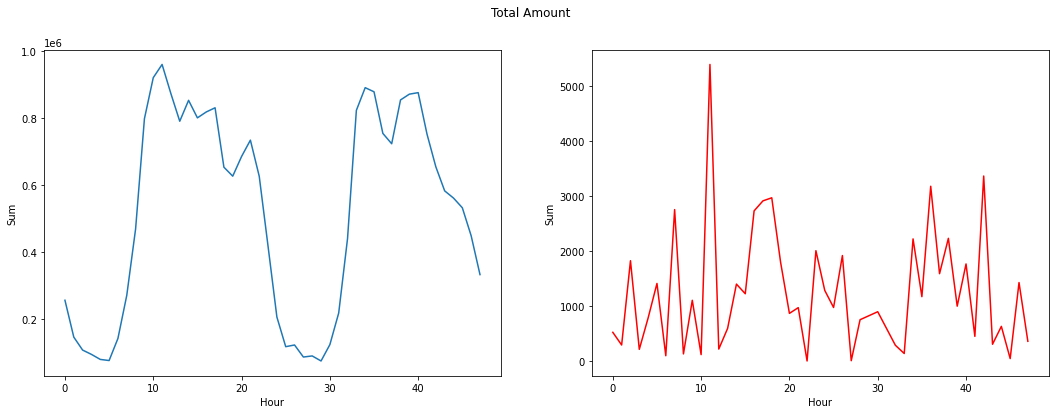

In [21]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Sum", data=dt.loc[dt.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Sum", data=dt.loc[dt.Class==1], color="red")
plt.suptitle("Total Amount")
plt.show();

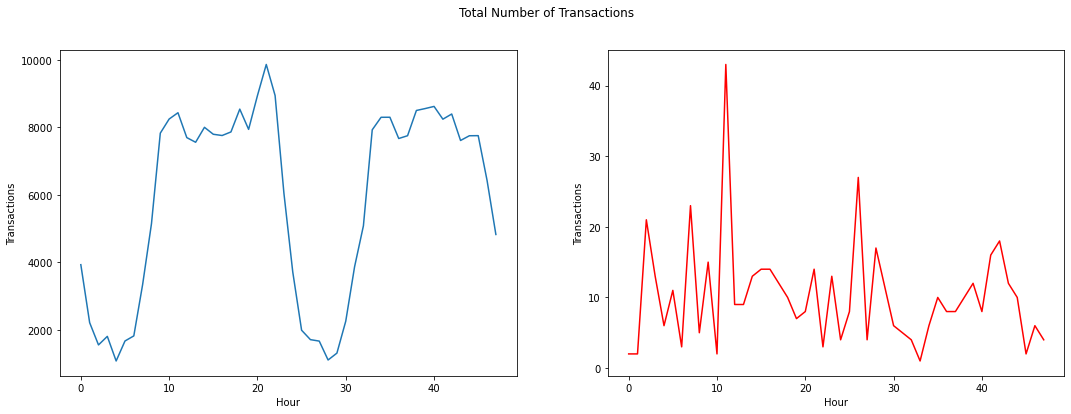

In [22]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Transactions", data=dt.loc[dt.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Transactions", data=dt.loc[dt.Class==1], color="red")
plt.suptitle("Total Number of Transactions")
plt.show();

In [23]:
# fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
# s = sns.lineplot(ax = ax1, x="Hour", y="Mean", data=dt.loc[dt.Class==0])
# s = sns.lineplot(ax = ax2, x="Hour", y="Mean", data=dt.loc[dt.Class==1], color="red")
# plt.suptitle("Average Amount of Transactions")
# plt.show();

In [24]:
# fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
# s = sns.lineplot(ax = ax1, x="Hour", y="Max", data=dt.loc[dt.Class==0])
# s = sns.lineplot(ax = ax2, x="Hour", y="Max", data=dt.loc[dt.Class==1], color="red")
# plt.suptitle("Maximum Amount of Transactions")
# plt.show();

In [25]:
# fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
# s = sns.lineplot(ax = ax1, x="Hour", y="Median", data=dt.loc[dt.Class==0])
# s = sns.lineplot(ax = ax2, x="Hour", y="Median", data=dt.loc[dt.Class==1], color="red")
# plt.suptitle("Median Amount of Transactions")
# plt.show();

In [26]:
# fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
# s = sns.lineplot(ax = ax1, x="Hour", y="Min", data=dt.loc[dt.Class==0])
# s = sns.lineplot(ax = ax2, x="Hour", y="Min", data=dt.loc[dt.Class==1], color="red")
# plt.suptitle("Minimum Amount of Transactions")
# plt.show();

### Transactions Amount

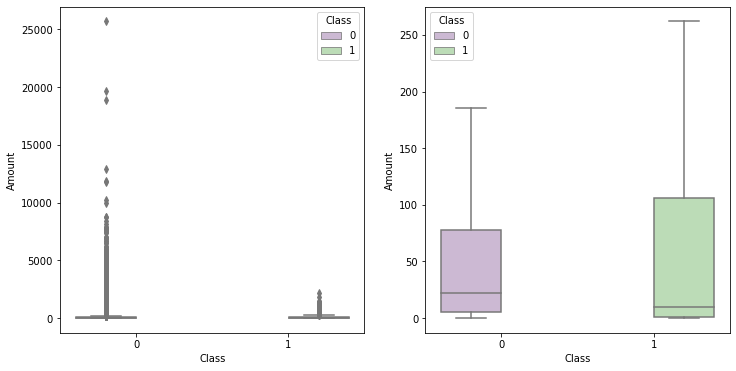

In [27]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="Class", y="Amount", hue="Class",data=df, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="Class", y="Amount", hue="Class",data=df, palette="PRGn",showfliers=False)
plt.show();

In [28]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class', 'Hour'],
      dtype='object')

In [29]:
dt.columns

Index(['Hour', 'Class', 'Min', 'Max', 'Transactions', 'Sum', 'Mean', 'Median',
       'Var'],
      dtype='object')

In [30]:
tmp = df[['Amount','Class']].copy()
class_0 = tmp.loc[tmp['Class'] == 0]['Amount']
class_1 = tmp.loc[tmp['Class'] == 1]['Amount']

class_0.describe()

count    283253.000000
mean         88.413575
std         250.379023
min           0.000000
25%           5.670000
50%          22.000000
75%          77.460000
max       25691.160000
Name: Amount, dtype: float64

In [31]:
class_1.describe()

count     473.000000
mean      123.871860
std       260.211041
min         0.000000
25%         1.000000
50%         9.820000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

#### The real transaction have a smaller mean value, larger Q2, larger Q3, smaller Q4 and larger outliers; while fraudulent transactions have a larger mean and smaller outliers.

In [32]:
fraud = df.loc[df['Class'] == 1]

trace = go.Scatter(
    x = fraud['Time'], y = fraud['Amount'],
    name="Amount",
     marker=dict(
                color='rgb(238,23,11)',
                line=dict(
                    color='red',
                    width=1),
                opacity=0.5,
            ),
    text= fraud['Amount'],
    mode = "markers"
)
data = [trace]
layout = dict(title = 'Amount of fraudulent transactions in time period (48 hrs)',
          xaxis = dict(title = 'Time [s]', showticklabels=True), 
          yaxis = dict(title = 'Amount'),
          hovermode='closest'
         )
fig = dict(data=data, layout=layout)
iplot(fig, filename='fraud-amount')

## Features Correlation

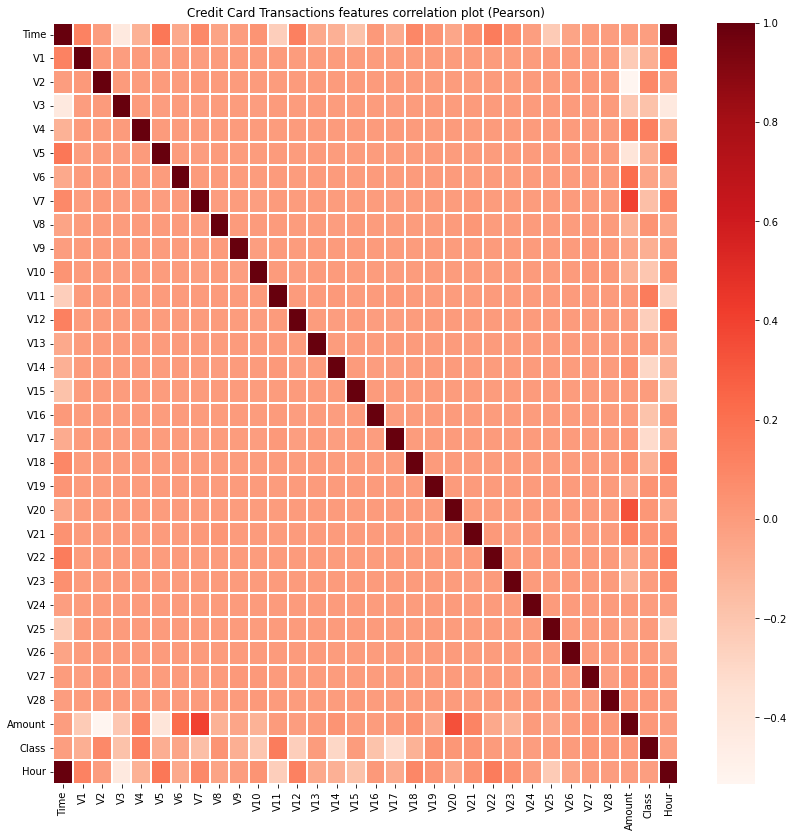

In [33]:
plt.figure(figsize = (14,14))
plt.title('Credit Card Transactions features correlation plot (Pearson)')
corr = df.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Reds")
plt.show()

#### As expected, there is no notable correlation between features V1-V28. There are certain correlations between some of these features and Time (inverse correlation with V3) and Amount (direct correlation with V7 and V20, inverse correlation with V2 and V5).

#### Let's plot the correlated and inverse correlated values on the same graph.

#### Let's start with the direct correlated values: {V20;Amount} and {V7;Amount}.

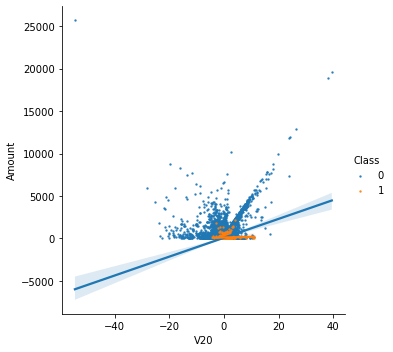

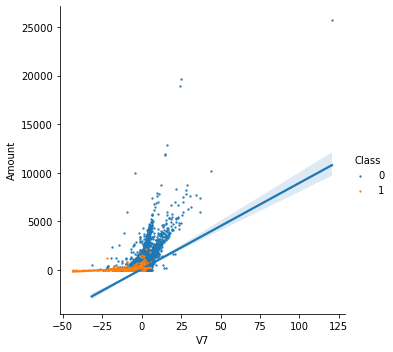

In [34]:
s = sns.lmplot(x='V20', y='Amount',data=df, hue='Class', fit_reg=True,scatter_kws={'s':2})
s = sns.lmplot(x='V7', y='Amount',data=df, hue='Class', fit_reg=True,scatter_kws={'s':2})
plt.show()

#### We can confirm that the two couples of features are correlated (the regression lines for Class = 0 have a positive slope, whilst the regression line for Class = 1 have a smaller positive slope).

#### Let's plot now the inverse correlated values.

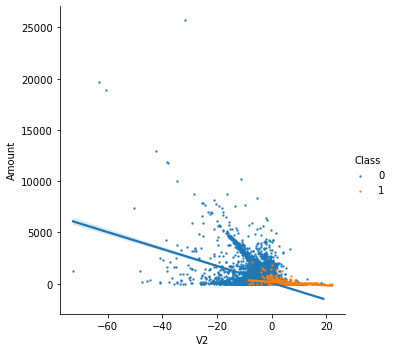

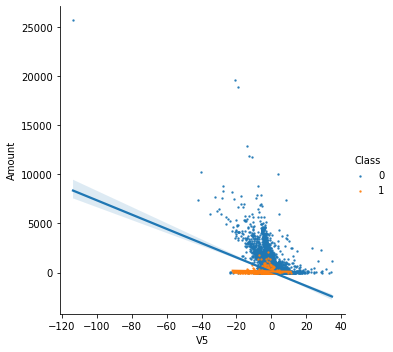

In [35]:
s = sns.lmplot(x='V2', y='Amount',data=df, hue='Class', fit_reg=True,scatter_kws={'s':2})
s = sns.lmplot(x='V5', y='Amount',data=df, hue='Class', fit_reg=True,scatter_kws={'s':2})
plt.show()

#### We can confirm that the two couples of features are inverse correlated (the regression lines for Class = 0 have a negative slope while the regression lines for Class = 1 have a very small negative slope).

### Features Density Plot

<Figure size 432x288 with 0 Axes>

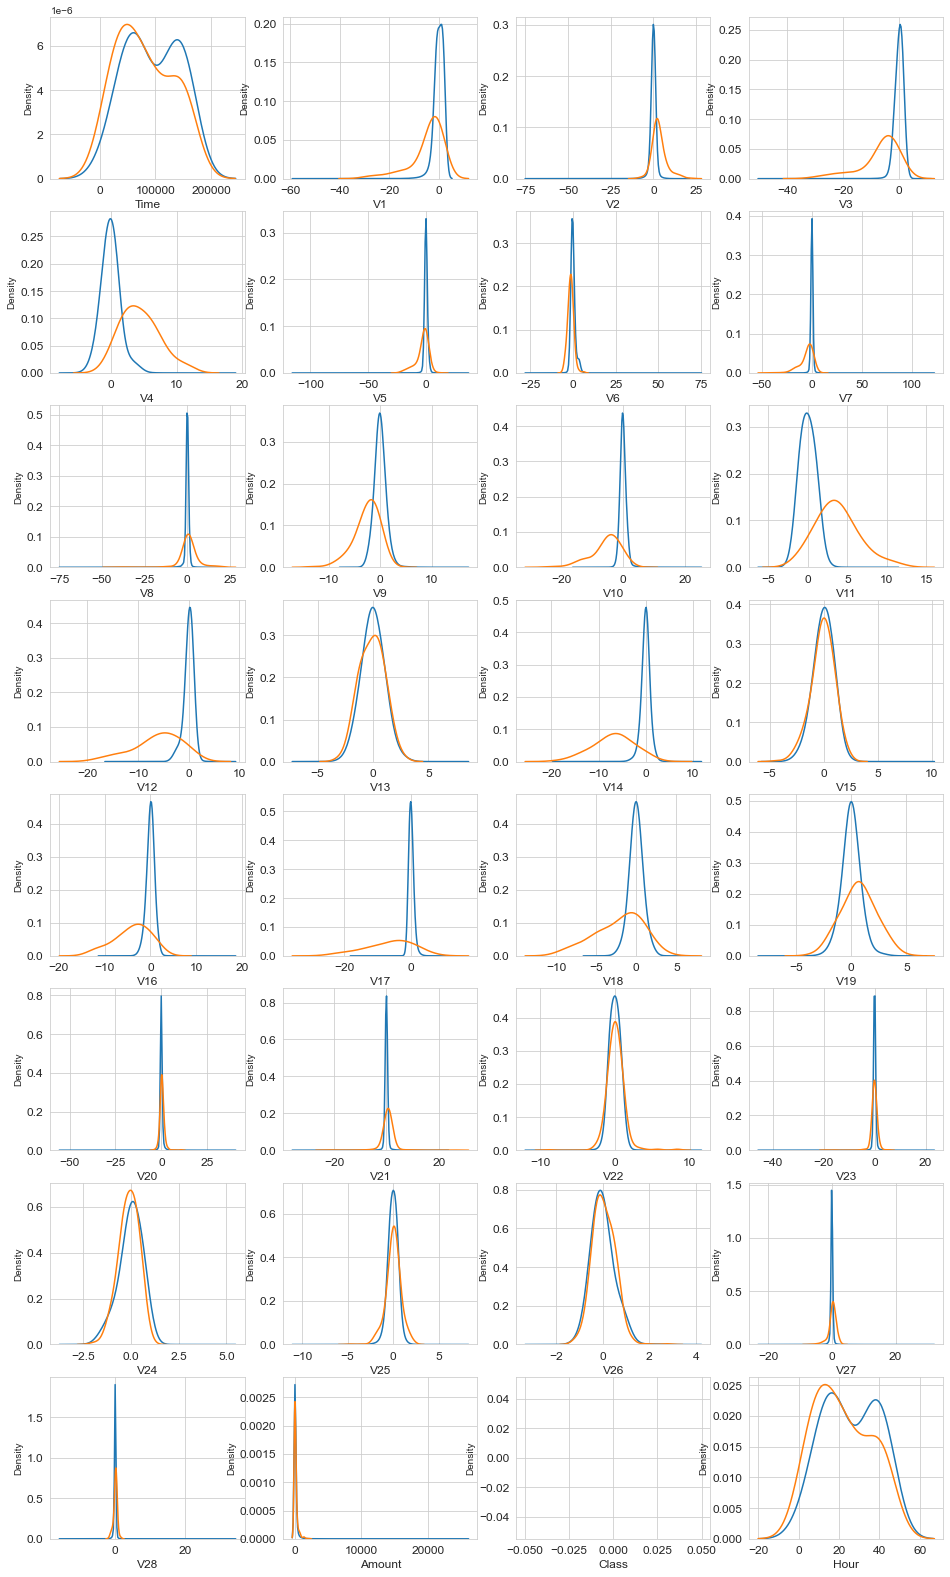

In [36]:
var = df.columns.values

i = 0
t0 = df.loc[df['Class'] == 0]
t1 = df.loc[df['Class'] == 1]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(8,4,figsize=(16,28))

for feature in var:
    i += 1
    plt.subplot(8,4,i)
    sns.kdeplot(t0[feature], bw=0.5,label="Class = 0")
    sns.kdeplot(t1[feature], bw=0.5,label="Class = 1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();

#### For some of the features we can observe a good selectivity in terms of distribution for the two values of Class: V4, V11 have clearly separated distributions for Class values 0 and 1, V12, V14, V18 are partially separated, V1, V2, V3, V10 have a quite distinct profile, whilst V25, V26, V28 have similar profiles for the two values of Class.

#### In general, with just few exceptions (Time and Amount), the features distribution for legitimate transactions (values of Class = 0) is centered around 0, sometime with a long queue at one of the extremities. In the same time, the fraudulent transactions (values of Class = 1) have a skewed (asymmetric) distribution.

### Dealing with Imbalanced Data

In [37]:
x = df['Class'].value_counts().index
y = df['Class'].value_counts().values

trace2 = go.Bar(
     x=x ,
     y=y,
     marker=dict(
         color=y,
         colorscale = 'Viridis',
         reversescale = True
     ),
     name="Imbalance",    
 )
layout = dict(
     title="Data imbalance - isFraud",
     width = 600, height = 700,
     xaxis=go.layout.XAxis(
     automargin=True),
     yaxis=dict(
         showgrid=False,
         showline=False,
         showticklabels=True,
         #domain=[0, 0.85],
     ), 
)
fig1 = go.Figure(data=[trace2], layout=layout)
iplot(fig1)

In [38]:
# Number of normal and fraud transactions in percentage
Count_Normal_transacation = len(df[df["Class"]==0])
Count_Fraud_transacation = len(df[df["Class"]==1])
Percentage_of_Normal_transacation = Count_Normal_transacation/(Count_Normal_transacation+Count_Fraud_transacation)
print("percentage of normal transacation is",Percentage_of_Normal_transacation*100)
Percentage_of_Fraud_transacation= Count_Fraud_transacation/(Count_Normal_transacation+Count_Fraud_transacation)
print("percentage of fraud transacation",Percentage_of_Fraud_transacation*100)

percentage of normal transacation is 99.83328986416473
percentage of fraud transacation 0.1667101358352777


#### Hence in data there is only 0.17 % are the fraud transcation while 99.83 are valid transcation
#### So, the data needs to be resampled
#### First, I plot the amount of transactions in relation to the frequency of valid and fraud transcations

<AxesSubplot:title={'center':'Normal Transaction'}, ylabel='Frequency'>

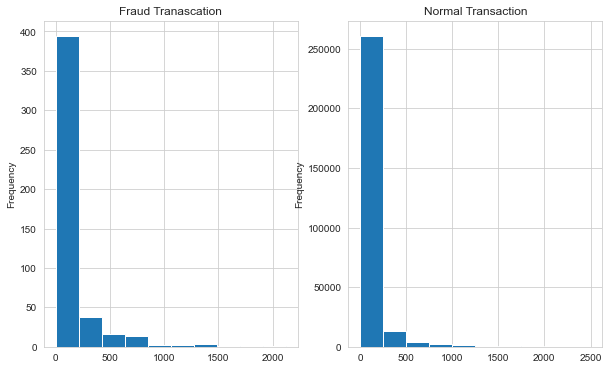

In [39]:
# The distribution of Normal transctions was not clear and it seemed like all transactions are less than 2.5 K so I decreased the Amount
Fraud_transacation = df[df["Class"]==1]
Normal_transacation= df[df["Class"]==0]
plt.figure(figsize=(10,6))
plt.subplot(121)
Fraud_transacation[Fraud_transacation["Amount"]<= 2500].Amount.plot.hist(title="Fraud Tranascation")
plt.subplot(122)
Normal_transacation[Normal_transacation["Amount"]<= 2500].Amount.plot.hist(title="Normal Transaction")

##### Normal Transactions have a max frequency of 250k transactions while Fraud Transactins have a max frequency of only 400 transactions

## Data Preprocessing

In [200]:
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,...,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,...,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,...,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,...,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,...,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [201]:
x = data.iloc[:,data.columns != "Class"]
y = data.iloc[:,data.columns == "Class"]

#### Here I was testing the different models using Undersampled Data so tha I can predict which model to use with the Oversampled Data without having to try them all on this big data (Because of the limited time and computing resources)
Also to be able to try more hyperparameter combinations
- Logistic regression
- Random Forest Classifier
- XGboost
- SVM
- KNN

### Resampling the Data

#### Random Undersampling:-
It means taking the less number of majority class (In our case taking less number of Normal transactions so that our new data will be balanced

#### Random Oversampling:-
It means using replicating the data of minority class (fraud class) so that we can have a balanced data

#### SMOTE:-
It is also a type of oversampling but in this we will make the synthetic example of Minority data and will give as a balanced data             
Note: I also tried SMOTE outside this notebook but Random Oversampler gave slightely higher accuracies

#### 1- Random Undersampling (RUS)

In [266]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state = 42)
X_train.shape, X_test.shape

((213605, 30), (71202, 30))

In [267]:
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X_train, y_train)

In [268]:
X_res.shape, y_res.shape

((758, 30), (758, 1))

In [269]:
X_res

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,...,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,42366.0,-0.476420,0.739210,1.158568,-0.167937,0.259654,-1.654996,0.809808,-0.383876,0.125470,-0.179774,0.112208,...,-0.354521,-1.010545,-0.063103,-0.166985,-0.258007,0.220099,0.856764,-1.363639,-0.304943,0.179439,0.071724,7.99
1,39861.0,-0.237207,0.758765,1.803322,0.981746,0.189607,0.207307,0.623705,0.043835,-0.391124,0.083113,1.282183,...,-0.128225,0.542692,-0.040802,-0.051955,0.102118,-0.031632,0.190333,-0.611077,-0.529700,0.031354,-0.067608,7.40
2,36925.0,-3.715401,-1.428003,-1.243007,-3.095572,0.057070,3.670014,0.032594,1.682715,1.021129,-2.343245,-0.628047,...,0.637950,0.292166,-0.450438,-0.030866,-0.245877,-0.479757,1.116283,0.566295,-0.217899,-0.616747,-0.622073,300.00
3,37835.0,1.422925,-0.318015,-0.071801,-0.574702,-0.837736,-1.598205,-0.053578,-0.402347,-1.098248,0.700274,-0.023987,...,-1.644755,0.515544,0.024802,0.206699,0.501618,-0.118717,0.753209,0.732005,-0.104027,-0.032046,0.004473,15.00
4,34677.0,-0.377797,1.037173,1.256206,0.079828,-0.057646,-0.967535,0.738798,-0.051081,-0.328858,-0.513466,-0.297895,...,-0.070455,-0.090552,0.126393,-0.257889,-0.731220,0.036010,0.313271,-0.168108,0.073210,0.235673,0.098740,21.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
753,41194.0,-7.896886,5.381020,-8.451162,7.963928,-7.862419,-2.376820,-11.949723,5.051356,-6.912076,-11.589748,6.645201,...,-8.495299,3.453943,0.645974,2.557944,0.926278,0.032795,0.638073,0.361887,0.444577,1.101923,0.205958,1.52
754,37167.0,-7.923891,-5.198360,-3.000024,4.420666,2.272194,-3.394483,-5.283435,0.131619,0.658176,-0.794994,3.266066,...,-1.711871,3.025261,-2.169811,-0.734308,-0.599926,-4.908301,0.410170,-1.167660,0.520508,1.937421,-1.552593,12.31
755,125612.0,1.889618,1.073099,-1.678018,4.173268,1.015516,-0.009389,-0.079706,0.064071,-0.714517,0.042228,-0.408403,...,1.580758,-2.335185,-0.153570,0.203728,0.733796,-0.036560,0.334306,0.147171,0.279556,0.031669,0.035883,3.22
756,102625.0,-4.221221,2.871121,-5.888716,6.890952,-3.404894,-1.154394,-7.739928,2.851363,-2.507569,-5.110728,5.350890,...,-4.192780,0.510570,-0.227882,1.620591,1.567947,-0.578007,-0.059045,-1.829169,-0.072429,0.136734,-0.599848,7.59


In [270]:
X_res["Normalized Amount SS"] = StandardScaler().fit_transform(X_res['Amount'].values.reshape(-1, 1))
X_res.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Normalized Amount SS
0,42366.0,-0.476420,0.739210,1.158568,-0.167937,0.259654,-1.654996,0.809808,-0.383876,0.125470,-0.179774,0.112208,...,-1.010545,-0.063103,-0.166985,-0.258007,0.220099,0.856764,-1.363639,-0.304943,0.179439,0.071724,7.99,-0.426870
1,39861.0,-0.237207,0.758765,1.803322,0.981746,0.189607,0.207307,0.623705,0.043835,-0.391124,0.083113,1.282183,...,0.542692,-0.040802,-0.051955,0.102118,-0.031632,0.190333,-0.611077,-0.529700,0.031354,-0.067608,7.40,-0.429662
2,36925.0,-3.715401,-1.428003,-1.243007,-3.095572,0.057070,3.670014,0.032594,1.682715,1.021129,-2.343245,-0.628047,...,0.292166,-0.450438,-0.030866,-0.245877,-0.479757,1.116283,0.566295,-0.217899,-0.616747,-0.622073,300.00,0.955232
3,37835.0,1.422925,-0.318015,-0.071801,-0.574702,-0.837736,-1.598205,-0.053578,-0.402347,-1.098248,0.700274,-0.023987,...,0.515544,0.024802,0.206699,0.501618,-0.118717,0.753209,0.732005,-0.104027,-0.032046,0.004473,15.00,-0.393691
4,34677.0,-0.377797,1.037173,1.256206,0.079828,-0.057646,-0.967535,0.738798,-0.051081,-0.328858,-0.513466,-0.297895,...,-0.090552,0.126393,-0.257889,-0.731220,0.036010,0.313271,-0.168108,0.073210,0.235673,0.098740,21.99,-0.360607


In [271]:
X_res.drop(["Time","Amount"],axis=1,inplace=True)
X_res.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,...,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Normalized Amount SS
0,-0.476420,0.739210,1.158568,-0.167937,0.259654,-1.654996,0.809808,-0.383876,0.125470,-0.179774,0.112208,-0.106467,...,-0.354521,-1.010545,-0.063103,-0.166985,-0.258007,0.220099,0.856764,-1.363639,-0.304943,0.179439,0.071724,-0.426870
1,-0.237207,0.758765,1.803322,0.981746,0.189607,0.207307,0.623705,0.043835,-0.391124,0.083113,1.282183,0.262712,...,-0.128225,0.542692,-0.040802,-0.051955,0.102118,-0.031632,0.190333,-0.611077,-0.529700,0.031354,-0.067608,-0.429662
2,-3.715401,-1.428003,-1.243007,-3.095572,0.057070,3.670014,0.032594,1.682715,1.021129,-2.343245,-0.628047,0.645714,...,0.637950,0.292166,-0.450438,-0.030866,-0.245877,-0.479757,1.116283,0.566295,-0.217899,-0.616747,-0.622073,0.955232
3,1.422925,-0.318015,-0.071801,-0.574702,-0.837736,-1.598205,-0.053578,-0.402347,-1.098248,0.700274,-0.023987,-0.779496,...,-1.644755,0.515544,0.024802,0.206699,0.501618,-0.118717,0.753209,0.732005,-0.104027,-0.032046,0.004473,-0.393691
4,-0.377797,1.037173,1.256206,0.079828,-0.057646,-0.967535,0.738798,-0.051081,-0.328858,-0.513466,-0.297895,-0.340273,...,-0.070455,-0.090552,0.126393,-0.257889,-0.731220,0.036010,0.313271,-0.168108,0.073210,0.235673,0.098740,-0.360607


In [272]:
X_test.drop(["Time"],axis=1,inplace=True)
X_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,...,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
43428,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,-8.507059,-14.110184,5.299236,-10.834006,...,-8.398552,3.101735,-1.514923,1.190739,-1.127670,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,364.19
49906,0.339812,-2.743745,-0.134070,-1.385729,-1.451413,1.015887,-0.524379,0.224060,0.899746,-0.565012,-0.087670,0.979427,...,1.752662,0.432546,0.506044,-0.213436,-0.942525,-0.526819,-1.156992,0.311211,-0.746647,0.040996,0.102038,520.12
29474,1.399590,-0.590701,0.168619,-1.029950,-0.539806,0.040444,-0.712567,0.002299,-0.971747,0.756801,0.543827,0.112453,...,-0.533300,1.192245,0.212877,0.102398,0.168269,-0.166639,-0.810250,0.505083,-0.232340,0.011409,0.004634,31.00
276481,-0.432071,1.647895,-1.669361,-0.349504,0.785785,-0.630647,0.276990,0.586025,-0.484715,-1.376648,-1.328335,0.223621,...,0.981343,0.101264,-0.244633,0.358932,0.873663,-0.178642,-0.017171,-0.207392,-0.157756,-0.237386,0.001934,1.50
278846,2.014160,-0.137394,-1.015839,0.327269,-0.182179,-0.956571,0.043241,-0.160746,0.363241,0.259452,0.942162,0.850038,...,-0.333816,0.404711,-0.255293,-0.238644,-0.616400,0.347045,0.061561,-0.360196,0.174730,-0.078043,-0.070571,0.89


+ ### Evaluation

Accuracy = TP+TN/Total

Precison = TP/(TP+FP)

Recall = TP/(TP+FN)

TP = True possitive means no of possitve cases which are predicted possitive

TN = True negative means no of negative cases which are predicted negative

FP = False possitve means no of negative cases which are predicted possitive

FN= False Negative means no of possitive cases which are predicted negative

Now for our case recall will be a better option because in these case no of normal transacations will be very high than the no of fraud cases and sometime a fraud case will be predicted as normal. So, recall will give us a sense of only fraud cases

## Modeling with Undersampled Data

### 1- Logistic Regression

In [273]:
param_grid = {'C':[0.01, 0.1, 1, 10, 100, 1000]}
# RUS 0.01, 1
# mean_test_score        0.931439

In [274]:
log_reg = LogisticRegression()

In [275]:
grid_rf_class = GridSearchCV(
    estimator = log_reg,
    param_grid = param_grid,
    scoring = 'accuracy',
    n_jobs = 4,
    cv = 10,
    refit = True,
    return_train_score = True
)

In [276]:
grid_rf_class.fit(X_res,y_res)

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=4,
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='accuracy')

In [277]:
y_pred = grid_rf_class.predict(X_test)

In [278]:
cv_results_df = pd.DataFrame(grid_rf_class.cv_results_)

In [279]:
cv_results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,...,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.033322,0.021275,0.002315,0.005273,0.01,{'C': 0.01},0.907895,0.934211,0.868421,0.921053,0.921053,0.934211,...,0.934018,0.932551,0.936950,0.932551,0.932551,0.932551,0.929619,0.934018,0.935578,0.929722,0.933011,0.002175
1,0.024111,0.008571,0.000000,0.000000,0.1,{'C': 0.1},0.921053,0.934211,0.855263,0.934211,0.921053,0.894737,...,0.941349,0.941349,0.950147,0.941349,0.934018,0.942815,0.936950,0.939883,0.947291,0.935578,0.941073,0.004719
2,0.029957,0.004809,0.003124,0.006249,1,{'C': 1},0.934211,0.934211,0.855263,0.947368,0.921053,0.881579,...,0.944282,0.947214,0.953079,0.941349,0.939883,0.945748,0.938416,0.939883,0.947291,0.939971,0.943712,0.004407
3,0.051295,0.013722,0.002298,0.005039,10,{'C': 10},0.947368,0.934211,0.868421,0.947368,0.921053,0.881579,...,0.947214,0.951613,0.958944,0.944282,0.947214,0.947214,0.942815,0.944282,0.953148,0.941435,0.947816,0.005084
4,0.063411,0.006691,0.003191,0.000746,100,{'C': 100},0.947368,0.921053,0.868421,0.960526,0.921053,0.894737,...,0.948680,0.951613,0.958944,0.945748,0.950147,0.950147,0.941349,0.947214,0.954612,0.941435,0.948989,0.005191
5,0.051415,0.007697,0.004022,0.005942,1000,{'C': 1000},0.947368,0.921053,0.868421,0.960526,0.921053,0.881579,...,0.948680,0.951613,0.957478,0.947214,0.947214,0.948680,0.941349,0.947214,0.957540,0.942899,0.948988,0.005071


In [280]:
cv_results_df.sort_values(by="rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,...,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
3,0.051295,0.013722,0.002298,0.005039,10,{'C': 10},0.947368,0.934211,0.868421,0.947368,0.921053,0.881579,...,0.947214,0.951613,0.958944,0.944282,0.947214,0.947214,0.942815,0.944282,0.953148,0.941435,0.947816,0.005084
4,0.063411,0.006691,0.003191,0.000746,100,{'C': 100},0.947368,0.921053,0.868421,0.960526,0.921053,0.894737,...,0.948680,0.951613,0.958944,0.945748,0.950147,0.950147,0.941349,0.947214,0.954612,0.941435,0.948989,0.005191
5,0.051415,0.007697,0.004022,0.005942,1000,{'C': 1000},0.947368,0.921053,0.868421,0.960526,0.921053,0.881579,...,0.948680,0.951613,0.957478,0.947214,0.947214,0.948680,0.941349,0.947214,0.957540,0.942899,0.948988,0.005071
0,0.033322,0.021275,0.002315,0.005273,0.01,{'C': 0.01},0.907895,0.934211,0.868421,0.921053,0.921053,0.934211,...,0.934018,0.932551,0.936950,0.932551,0.932551,0.932551,0.929619,0.934018,0.935578,0.929722,0.933011,0.002175
2,0.029957,0.004809,0.003124,0.006249,1,{'C': 1},0.934211,0.934211,0.855263,0.947368,0.921053,0.881579,...,0.944282,0.947214,0.953079,0.941349,0.939883,0.945748,0.938416,0.939883,0.947291,0.939971,0.943712,0.004407
1,0.024111,0.008571,0.000000,0.000000,0.1,{'C': 0.1},0.921053,0.934211,0.855263,0.934211,0.921053,0.894737,...,0.941349,0.941349,0.950147,0.941349,0.934018,0.942815,0.936950,0.939883,0.947291,0.935578,0.941073,0.004719


In [281]:
best_row = cv_results_df[cv_results_df['rank_test_score'] == 1]
print(best_row.T)

                            3
mean_fit_time        0.051295
std_fit_time         0.013722
mean_score_time      0.002298
std_score_time       0.005039
param_C                    10
params              {'C': 10}
split0_test_score    0.947368
split1_test_score    0.934211
split2_test_score    0.868421
split3_test_score    0.947368
split4_test_score    0.921053
split5_test_score    0.881579
split6_test_score    0.986842
split7_test_score    0.947368
split8_test_score    0.893333
split9_test_score        0.96
mean_test_score      0.928754
std_test_score       0.035495
rank_test_score             1
split0_train_score   0.947214
split1_train_score   0.951613
split2_train_score   0.958944
split3_train_score   0.944282
split4_train_score   0.947214
split5_train_score   0.947214
split6_train_score   0.942815
split7_train_score   0.944282
split8_train_score   0.953148
split9_train_score   0.941435
mean_train_score     0.947816
std_train_score      0.005084


In [282]:
print(grid_rf_class.best_estimator_)

LogisticRegression(C=10)


In [283]:
lr = grid_rf_class.best_estimator_

In [284]:
lr

LogisticRegression(C=10)

              precision    recall  f1-score   support

           0       1.00      0.14      0.25     71089
           1       0.00      0.98      0.00       113

    accuracy                           0.15     71202
   macro avg       0.50      0.56      0.13     71202
weighted avg       1.00      0.15      0.25     71202



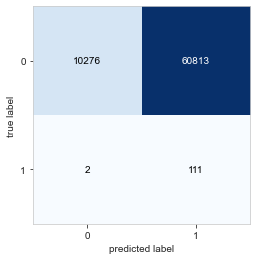

In [285]:
conf = confusion_matrix(y_test , y_pred)
plot_confusion_matrix(conf)
print(classification_report(y_test , y_pred))

In [ ]:
# yhat = grid_rf_class.best_estimator_.predict_proba(X_test)
# naive_probs = yhat[:, 1]
# # calculate the precision-recall auc
# precision, recall, _ = precision_recall_curve(y_test, naive_probs)
# auc_score = auc(recall, precision)
# print('No Skill PR AUC: %.3f' % auc_score)
# # fit a model
# model = LogisticRegression(solver='lbfgs')
# model.fit(X_res, y_res)
# yhat = model.predict_proba(X_test)
# model_probs = yhat[:, 1]
# # calculate the precision-recall auc
# precision, recall, _ = precision_recall_curve(y_test, model_probs)
# auc_score = auc(recall, precision)
# print('Logistic PR AUC: %.3f' % auc_score)
# # plot precision-recall curves
# plot_pr_curve(y_test, model_probs)

In [71]:
#############################################################################################################################

#### I then go split and undersample tha data again to try a different model

### RUS

In [72]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state = 42)
X_train.shape, X_test.shape

((213605, 30), (71202, 30))

In [73]:
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X_train, y_train)

In [74]:
X_res.shape, y_res.shape

((758, 30), (758, 1))

In [75]:
X_res

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,...,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,42366.0,-0.476420,0.739210,1.158568,-0.167937,0.259654,-1.654996,0.809808,-0.383876,0.125470,-0.179774,0.112208,...,-0.354521,-1.010545,-0.063103,-0.166985,-0.258007,0.220099,0.856764,-1.363639,-0.304943,0.179439,0.071724,7.99
1,39861.0,-0.237207,0.758765,1.803322,0.981746,0.189607,0.207307,0.623705,0.043835,-0.391124,0.083113,1.282183,...,-0.128225,0.542692,-0.040802,-0.051955,0.102118,-0.031632,0.190333,-0.611077,-0.529700,0.031354,-0.067608,7.40
2,36925.0,-3.715401,-1.428003,-1.243007,-3.095572,0.057070,3.670014,0.032594,1.682715,1.021129,-2.343245,-0.628047,...,0.637950,0.292166,-0.450438,-0.030866,-0.245877,-0.479757,1.116283,0.566295,-0.217899,-0.616747,-0.622073,300.00
3,37835.0,1.422925,-0.318015,-0.071801,-0.574702,-0.837736,-1.598205,-0.053578,-0.402347,-1.098248,0.700274,-0.023987,...,-1.644755,0.515544,0.024802,0.206699,0.501618,-0.118717,0.753209,0.732005,-0.104027,-0.032046,0.004473,15.00
4,34677.0,-0.377797,1.037173,1.256206,0.079828,-0.057646,-0.967535,0.738798,-0.051081,-0.328858,-0.513466,-0.297895,...,-0.070455,-0.090552,0.126393,-0.257889,-0.731220,0.036010,0.313271,-0.168108,0.073210,0.235673,0.098740,21.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
753,41194.0,-7.896886,5.381020,-8.451162,7.963928,-7.862419,-2.376820,-11.949723,5.051356,-6.912076,-11.589748,6.645201,...,-8.495299,3.453943,0.645974,2.557944,0.926278,0.032795,0.638073,0.361887,0.444577,1.101923,0.205958,1.52
754,37167.0,-7.923891,-5.198360,-3.000024,4.420666,2.272194,-3.394483,-5.283435,0.131619,0.658176,-0.794994,3.266066,...,-1.711871,3.025261,-2.169811,-0.734308,-0.599926,-4.908301,0.410170,-1.167660,0.520508,1.937421,-1.552593,12.31
755,125612.0,1.889618,1.073099,-1.678018,4.173268,1.015516,-0.009389,-0.079706,0.064071,-0.714517,0.042228,-0.408403,...,1.580758,-2.335185,-0.153570,0.203728,0.733796,-0.036560,0.334306,0.147171,0.279556,0.031669,0.035883,3.22
756,102625.0,-4.221221,2.871121,-5.888716,6.890952,-3.404894,-1.154394,-7.739928,2.851363,-2.507569,-5.110728,5.350890,...,-4.192780,0.510570,-0.227882,1.620591,1.567947,-0.578007,-0.059045,-1.829169,-0.072429,0.136734,-0.599848,7.59


In [76]:
X_res["Normalized Amount SS"] = StandardScaler().fit_transform(X_res['Amount'].values.reshape(-1, 1))
X_res.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Normalized Amount SS
0,42366.0,-0.476420,0.739210,1.158568,-0.167937,0.259654,-1.654996,0.809808,-0.383876,0.125470,-0.179774,0.112208,...,-1.010545,-0.063103,-0.166985,-0.258007,0.220099,0.856764,-1.363639,-0.304943,0.179439,0.071724,7.99,-0.426870
1,39861.0,-0.237207,0.758765,1.803322,0.981746,0.189607,0.207307,0.623705,0.043835,-0.391124,0.083113,1.282183,...,0.542692,-0.040802,-0.051955,0.102118,-0.031632,0.190333,-0.611077,-0.529700,0.031354,-0.067608,7.40,-0.429662
2,36925.0,-3.715401,-1.428003,-1.243007,-3.095572,0.057070,3.670014,0.032594,1.682715,1.021129,-2.343245,-0.628047,...,0.292166,-0.450438,-0.030866,-0.245877,-0.479757,1.116283,0.566295,-0.217899,-0.616747,-0.622073,300.00,0.955232
3,37835.0,1.422925,-0.318015,-0.071801,-0.574702,-0.837736,-1.598205,-0.053578,-0.402347,-1.098248,0.700274,-0.023987,...,0.515544,0.024802,0.206699,0.501618,-0.118717,0.753209,0.732005,-0.104027,-0.032046,0.004473,15.00,-0.393691
4,34677.0,-0.377797,1.037173,1.256206,0.079828,-0.057646,-0.967535,0.738798,-0.051081,-0.328858,-0.513466,-0.297895,...,-0.090552,0.126393,-0.257889,-0.731220,0.036010,0.313271,-0.168108,0.073210,0.235673,0.098740,21.99,-0.360607


In [77]:
X_res.drop(["Time","Amount"],axis=1,inplace=True)
X_res.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,...,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Normalized Amount SS
0,-0.476420,0.739210,1.158568,-0.167937,0.259654,-1.654996,0.809808,-0.383876,0.125470,-0.179774,0.112208,-0.106467,...,-0.354521,-1.010545,-0.063103,-0.166985,-0.258007,0.220099,0.856764,-1.363639,-0.304943,0.179439,0.071724,-0.426870
1,-0.237207,0.758765,1.803322,0.981746,0.189607,0.207307,0.623705,0.043835,-0.391124,0.083113,1.282183,0.262712,...,-0.128225,0.542692,-0.040802,-0.051955,0.102118,-0.031632,0.190333,-0.611077,-0.529700,0.031354,-0.067608,-0.429662
2,-3.715401,-1.428003,-1.243007,-3.095572,0.057070,3.670014,0.032594,1.682715,1.021129,-2.343245,-0.628047,0.645714,...,0.637950,0.292166,-0.450438,-0.030866,-0.245877,-0.479757,1.116283,0.566295,-0.217899,-0.616747,-0.622073,0.955232
3,1.422925,-0.318015,-0.071801,-0.574702,-0.837736,-1.598205,-0.053578,-0.402347,-1.098248,0.700274,-0.023987,-0.779496,...,-1.644755,0.515544,0.024802,0.206699,0.501618,-0.118717,0.753209,0.732005,-0.104027,-0.032046,0.004473,-0.393691
4,-0.377797,1.037173,1.256206,0.079828,-0.057646,-0.967535,0.738798,-0.051081,-0.328858,-0.513466,-0.297895,-0.340273,...,-0.070455,-0.090552,0.126393,-0.257889,-0.731220,0.036010,0.313271,-0.168108,0.073210,0.235673,0.098740,-0.360607


In [78]:
X_test.drop(["Time"],axis=1,inplace=True)
X_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,...,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
43428,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,-8.507059,-14.110184,5.299236,-10.834006,...,-8.398552,3.101735,-1.514923,1.190739,-1.127670,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,364.19
49906,0.339812,-2.743745,-0.134070,-1.385729,-1.451413,1.015887,-0.524379,0.224060,0.899746,-0.565012,-0.087670,0.979427,...,1.752662,0.432546,0.506044,-0.213436,-0.942525,-0.526819,-1.156992,0.311211,-0.746647,0.040996,0.102038,520.12
29474,1.399590,-0.590701,0.168619,-1.029950,-0.539806,0.040444,-0.712567,0.002299,-0.971747,0.756801,0.543827,0.112453,...,-0.533300,1.192245,0.212877,0.102398,0.168269,-0.166639,-0.810250,0.505083,-0.232340,0.011409,0.004634,31.00
276481,-0.432071,1.647895,-1.669361,-0.349504,0.785785,-0.630647,0.276990,0.586025,-0.484715,-1.376648,-1.328335,0.223621,...,0.981343,0.101264,-0.244633,0.358932,0.873663,-0.178642,-0.017171,-0.207392,-0.157756,-0.237386,0.001934,1.50
278846,2.014160,-0.137394,-1.015839,0.327269,-0.182179,-0.956571,0.043241,-0.160746,0.363241,0.259452,0.942162,0.850038,...,-0.333816,0.404711,-0.255293,-0.238644,-0.616400,0.347045,0.061561,-0.360196,0.174730,-0.078043,-0.070571,0.89


### 2- Random Forest

In [79]:
param_grid = {'max_depth':[6,7,8,9,10,11,12,13], 'max_features': [4,6,8,10,12,15], 'n_estimators' : [15,16,17,18,19,20,21,22,23]}

In [80]:
rf_class = RandomForestClassifier()

In [81]:
grid_rf_class = GridSearchCV(
    estimator = rf_class,
    param_grid = param_grid,
    scoring = 'accuracy',
    n_jobs = 4,
    cv = 10,
    refit = True,
    return_train_score = True
)

In [82]:
grid_rf_class.fit(X_res,y_res)

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'max_depth': [6, 7, 8, 9, 10, 11, 12, 13],
                         'max_features': [4, 6, 8, 10, 12, 15],
                         'n_estimators': [15, 16, 17, 18, 19, 20, 21, 22, 23]},
             return_train_score=True, scoring='accuracy')

In [83]:
grid_rf_class.predict(X_test)

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [84]:
cv_results_df = pd.DataFrame(grid_rf_class.cv_results_)

In [85]:
cv_results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.052554,0.006749,0.005485,0.001201,6,4,15,"{'max_depth': 6, 'max_features': 4, 'n_estimat...",0.934211,0.934211,0.881579,0.934211,...,0.967742,0.960411,0.972141,0.960411,0.961877,0.964809,0.966276,0.964809,0.964861,0.960469,0.964380,0.003589
1,0.053000,0.007252,0.004704,0.002014,6,4,16,"{'max_depth': 6, 'max_features': 4, 'n_estimat...",0.934211,0.921053,0.868421,0.934211,...,0.964809,0.967742,0.978006,0.964809,0.963343,0.976540,0.967742,0.964809,0.972182,0.964861,0.968484,0.005004
2,0.053853,0.009242,0.004778,0.001645,6,4,17,"{'max_depth': 6, 'max_features': 4, 'n_estimat...",0.934211,0.921053,0.855263,0.934211,...,0.970674,0.958944,0.969208,0.964809,0.969208,0.963343,0.963343,0.966276,0.970717,0.967789,0.966431,0.003625
3,0.061671,0.008478,0.006573,0.001241,6,4,18,"{'max_depth': 6, 'max_features': 4, 'n_estimat...",0.934211,0.934211,0.881579,0.934211,...,0.964809,0.963343,0.972141,0.964809,0.964809,0.969208,0.963343,0.967742,0.966325,0.967789,0.966432,0.002662
4,0.057229,0.009238,0.005206,0.001172,6,4,19,"{'max_depth': 6, 'max_features': 4, 'n_estimat...",0.921053,0.934211,0.855263,0.934211,...,0.970674,0.964809,0.970674,0.966276,0.966276,0.970674,0.964809,0.975073,0.972182,0.961933,0.968338,0.003885
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,0.106561,0.006158,0.003125,0.006250,13,15,19,"{'max_depth': 13, 'max_features': 15, 'n_estim...",0.947368,0.921053,0.842105,0.947368,...,1.000000,0.995601,0.998534,0.997067,0.995601,0.998534,0.998534,1.000000,1.000000,0.998536,0.998241,0.001579
428,0.101651,0.010401,0.004686,0.007158,13,15,20,"{'max_depth': 13, 'max_features': 15, 'n_estim...",0.947368,0.947368,0.855263,0.947368,...,0.998534,0.998534,0.997067,0.998534,0.997067,0.998534,0.998534,0.995601,0.994143,1.000000,0.997655,0.001631
429,0.117393,0.014556,0.003623,0.006178,13,15,21,"{'max_depth': 13, 'max_features': 15, 'n_estim...",0.947368,0.921053,0.855263,0.947368,...,0.998534,0.998534,0.998534,0.998534,0.998534,0.997067,1.000000,1.000000,1.000000,1.000000,0.998974,0.000939
430,0.117207,0.012375,0.004687,0.007159,13,15,22,"{'max_depth': 13, 'max_features': 15, 'n_estim...",0.947368,0.934211,0.828947,0.934211,...,0.997067,0.992669,1.000000,1.000000,1.000000,1.000000,0.997067,0.998534,1.000000,0.994143,0.997948,0.002555


In [86]:
cv_results_df.sort_values(by="rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
171,0.056794,0.010115,0.005950,0.003388,9,6,15,"{'max_depth': 9, 'max_features': 6, 'n_estimat...",0.960526,0.973684,0.881579,0.960526,...,0.989736,0.985337,0.989736,0.989736,0.988270,0.988270,0.988270,0.986804,0.992679,0.986823,0.988566,0.001946
60,0.069614,0.014611,0.004971,0.002186,7,4,21,"{'max_depth': 7, 'max_features': 4, 'n_estimat...",0.960526,0.947368,0.881579,0.947368,...,0.982405,0.969208,0.975073,0.969208,0.973607,0.975073,0.969208,0.972141,0.979502,0.970717,0.973614,0.004301
164,0.054081,0.008773,0.007014,0.004711,9,4,17,"{'max_depth': 9, 'max_features': 4, 'n_estimat...",0.947368,0.947368,0.907895,0.947368,...,0.986804,0.982405,0.992669,0.985337,0.986804,0.985337,0.985337,0.982405,0.994143,0.988287,0.986953,0.003680
19,0.064973,0.013443,0.006879,0.006200,6,8,16,"{'max_depth': 6, 'max_features': 8, 'n_estimat...",0.960526,0.934211,0.894737,0.960526,...,0.970674,0.975073,0.980938,0.967742,0.969208,0.973607,0.970674,0.972141,0.975110,0.976574,0.973174,0.003717
199,0.068156,0.014137,0.004792,0.007326,9,12,16,"{'max_depth': 9, 'max_features': 12, 'n_estima...",0.947368,0.947368,0.894737,0.947368,...,0.991202,0.986804,0.994135,0.992669,0.992669,0.992669,0.995601,0.994135,0.997072,0.991215,0.992817,0.002659
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.107574,0.008484,0.006184,0.001246,7,12,20,"{'max_depth': 7, 'max_features': 12, 'n_estima...",0.934211,0.921053,0.815789,0.934211,...,0.985337,0.983871,0.989736,0.982405,0.982405,0.986804,0.983871,0.982405,0.991215,0.982430,0.985048,0.003062
264,0.101242,0.013539,0.006245,0.007648,10,15,18,"{'max_depth': 10, 'max_features': 15, 'n_estim...",0.947368,0.934211,0.842105,0.934211,...,0.998534,0.995601,0.998534,0.991202,1.000000,0.997067,0.995601,0.994135,1.000000,0.997072,0.996775,0.002607
253,0.076674,0.010287,0.003124,0.006249,10,12,16,"{'max_depth': 10, 'max_features': 12, 'n_estim...",0.934211,0.907895,0.855263,0.934211,...,0.997067,0.997067,0.994135,0.991202,0.997067,0.994135,0.992669,0.995601,0.995608,0.998536,0.995309,0.002155
289,0.060585,0.011061,0.003125,0.006250,11,8,16,"{'max_depth': 11, 'max_features': 8, 'n_estima...",0.921053,0.934211,0.842105,0.947368,...,0.992669,0.994135,1.000000,0.997067,0.995601,0.994135,0.995601,0.997067,0.997072,0.997072,0.996042,0.001973


In [87]:
best_row = cv_results_df[cv_results_df['rank_test_score'] == 1]
print(best_row.T)

                                                                  171
mean_fit_time                                                0.056794
std_fit_time                                                 0.010115
mean_score_time                                               0.00595
std_score_time                                               0.003388
param_max_depth                                                     9
param_max_features                                                  6
param_n_estimators                                                 15
params              {'max_depth': 9, 'max_features': 6, 'n_estimat...
split0_test_score                                            0.960526
split1_test_score                                            0.973684
split2_test_score                                            0.881579
split3_test_score                                            0.960526
split4_test_score                                            0.960526
split5_test_score   

In [88]:
print(grid_rf_class.best_estimator_)

RandomForestClassifier(max_depth=9, max_features=6, n_estimators=15)


In [89]:
rfc = grid_rf_class.best_estimator_

In [90]:
rfc

RandomForestClassifier(max_depth=9, max_features=6, n_estimators=15)

In [91]:
featimp = pd.Series(rfc.feature_importances_,index=X_res.columns).sort_values(ascending=False)
print(featimp) 
# This is a property of Random Forest classifier that provides us with the importance of the features used

V14                     0.256394
V4                      0.171103
V12                     0.103770
V10                     0.077981
V3                      0.059915
V11                     0.053353
V7                      0.047439
V16                     0.040860
V27                     0.030611
V17                     0.023277
V26                     0.012710
V8                      0.012377
V20                     0.012355
Normalized Amount SS    0.011003
V19                     0.010245
V6                      0.008948
V22                     0.008509
V28                     0.006887
V5                      0.006554
V15                     0.006430
V13                     0.005632
V18                     0.005618
V21                     0.005245
V9                      0.005035
V2                      0.004469
V25                     0.004290
V1                      0.004170
V23                     0.002704
V24                     0.002117
dtype: float64


              precision    recall  f1-score   support

           0       1.00      0.14      0.25     71089
           1       0.00      0.98      0.00       113

    accuracy                           0.15     71202
   macro avg       0.50      0.56      0.13     71202
weighted avg       1.00      0.15      0.25     71202



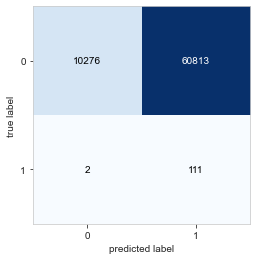

In [92]:
conf = confusion_matrix(y_test , y_pred)
plot_confusion_matrix(conf)
print(classification_report(y_test , y_pred))

In [93]:
##########################################################################################################################

### RUS

In [299]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state = 42)
X_train.shape, X_test.shape

((213605, 30), (71202, 30))

In [300]:
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X_train, y_train)

In [301]:
X_res.shape, y_res.shape

((758, 30), (758, 1))

In [302]:
X_res

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,...,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,42366.0,-0.476420,0.739210,1.158568,-0.167937,0.259654,-1.654996,0.809808,-0.383876,0.125470,-0.179774,0.112208,...,-0.354521,-1.010545,-0.063103,-0.166985,-0.258007,0.220099,0.856764,-1.363639,-0.304943,0.179439,0.071724,7.99
1,39861.0,-0.237207,0.758765,1.803322,0.981746,0.189607,0.207307,0.623705,0.043835,-0.391124,0.083113,1.282183,...,-0.128225,0.542692,-0.040802,-0.051955,0.102118,-0.031632,0.190333,-0.611077,-0.529700,0.031354,-0.067608,7.40
2,36925.0,-3.715401,-1.428003,-1.243007,-3.095572,0.057070,3.670014,0.032594,1.682715,1.021129,-2.343245,-0.628047,...,0.637950,0.292166,-0.450438,-0.030866,-0.245877,-0.479757,1.116283,0.566295,-0.217899,-0.616747,-0.622073,300.00
3,37835.0,1.422925,-0.318015,-0.071801,-0.574702,-0.837736,-1.598205,-0.053578,-0.402347,-1.098248,0.700274,-0.023987,...,-1.644755,0.515544,0.024802,0.206699,0.501618,-0.118717,0.753209,0.732005,-0.104027,-0.032046,0.004473,15.00
4,34677.0,-0.377797,1.037173,1.256206,0.079828,-0.057646,-0.967535,0.738798,-0.051081,-0.328858,-0.513466,-0.297895,...,-0.070455,-0.090552,0.126393,-0.257889,-0.731220,0.036010,0.313271,-0.168108,0.073210,0.235673,0.098740,21.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
753,41194.0,-7.896886,5.381020,-8.451162,7.963928,-7.862419,-2.376820,-11.949723,5.051356,-6.912076,-11.589748,6.645201,...,-8.495299,3.453943,0.645974,2.557944,0.926278,0.032795,0.638073,0.361887,0.444577,1.101923,0.205958,1.52
754,37167.0,-7.923891,-5.198360,-3.000024,4.420666,2.272194,-3.394483,-5.283435,0.131619,0.658176,-0.794994,3.266066,...,-1.711871,3.025261,-2.169811,-0.734308,-0.599926,-4.908301,0.410170,-1.167660,0.520508,1.937421,-1.552593,12.31
755,125612.0,1.889618,1.073099,-1.678018,4.173268,1.015516,-0.009389,-0.079706,0.064071,-0.714517,0.042228,-0.408403,...,1.580758,-2.335185,-0.153570,0.203728,0.733796,-0.036560,0.334306,0.147171,0.279556,0.031669,0.035883,3.22
756,102625.0,-4.221221,2.871121,-5.888716,6.890952,-3.404894,-1.154394,-7.739928,2.851363,-2.507569,-5.110728,5.350890,...,-4.192780,0.510570,-0.227882,1.620591,1.567947,-0.578007,-0.059045,-1.829169,-0.072429,0.136734,-0.599848,7.59


In [303]:
X_res["Normalized Amount SS"] = StandardScaler().fit_transform(X_res['Amount'].values.reshape(-1, 1))
X_res.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Normalized Amount SS
0,42366.0,-0.476420,0.739210,1.158568,-0.167937,0.259654,-1.654996,0.809808,-0.383876,0.125470,-0.179774,0.112208,...,-1.010545,-0.063103,-0.166985,-0.258007,0.220099,0.856764,-1.363639,-0.304943,0.179439,0.071724,7.99,-0.426870
1,39861.0,-0.237207,0.758765,1.803322,0.981746,0.189607,0.207307,0.623705,0.043835,-0.391124,0.083113,1.282183,...,0.542692,-0.040802,-0.051955,0.102118,-0.031632,0.190333,-0.611077,-0.529700,0.031354,-0.067608,7.40,-0.429662
2,36925.0,-3.715401,-1.428003,-1.243007,-3.095572,0.057070,3.670014,0.032594,1.682715,1.021129,-2.343245,-0.628047,...,0.292166,-0.450438,-0.030866,-0.245877,-0.479757,1.116283,0.566295,-0.217899,-0.616747,-0.622073,300.00,0.955232
3,37835.0,1.422925,-0.318015,-0.071801,-0.574702,-0.837736,-1.598205,-0.053578,-0.402347,-1.098248,0.700274,-0.023987,...,0.515544,0.024802,0.206699,0.501618,-0.118717,0.753209,0.732005,-0.104027,-0.032046,0.004473,15.00,-0.393691
4,34677.0,-0.377797,1.037173,1.256206,0.079828,-0.057646,-0.967535,0.738798,-0.051081,-0.328858,-0.513466,-0.297895,...,-0.090552,0.126393,-0.257889,-0.731220,0.036010,0.313271,-0.168108,0.073210,0.235673,0.098740,21.99,-0.360607


In [304]:
X_res.drop(["Time","Amount"],axis=1,inplace=True)
X_res.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,...,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Normalized Amount SS
0,-0.476420,0.739210,1.158568,-0.167937,0.259654,-1.654996,0.809808,-0.383876,0.125470,-0.179774,0.112208,-0.106467,...,-0.354521,-1.010545,-0.063103,-0.166985,-0.258007,0.220099,0.856764,-1.363639,-0.304943,0.179439,0.071724,-0.426870
1,-0.237207,0.758765,1.803322,0.981746,0.189607,0.207307,0.623705,0.043835,-0.391124,0.083113,1.282183,0.262712,...,-0.128225,0.542692,-0.040802,-0.051955,0.102118,-0.031632,0.190333,-0.611077,-0.529700,0.031354,-0.067608,-0.429662
2,-3.715401,-1.428003,-1.243007,-3.095572,0.057070,3.670014,0.032594,1.682715,1.021129,-2.343245,-0.628047,0.645714,...,0.637950,0.292166,-0.450438,-0.030866,-0.245877,-0.479757,1.116283,0.566295,-0.217899,-0.616747,-0.622073,0.955232
3,1.422925,-0.318015,-0.071801,-0.574702,-0.837736,-1.598205,-0.053578,-0.402347,-1.098248,0.700274,-0.023987,-0.779496,...,-1.644755,0.515544,0.024802,0.206699,0.501618,-0.118717,0.753209,0.732005,-0.104027,-0.032046,0.004473,-0.393691
4,-0.377797,1.037173,1.256206,0.079828,-0.057646,-0.967535,0.738798,-0.051081,-0.328858,-0.513466,-0.297895,-0.340273,...,-0.070455,-0.090552,0.126393,-0.257889,-0.731220,0.036010,0.313271,-0.168108,0.073210,0.235673,0.098740,-0.360607


In [305]:
X_test.drop(["Time"],axis=1,inplace=True)
X_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,...,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
43428,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,-8.507059,-14.110184,5.299236,-10.834006,...,-8.398552,3.101735,-1.514923,1.190739,-1.127670,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,364.19
49906,0.339812,-2.743745,-0.134070,-1.385729,-1.451413,1.015887,-0.524379,0.224060,0.899746,-0.565012,-0.087670,0.979427,...,1.752662,0.432546,0.506044,-0.213436,-0.942525,-0.526819,-1.156992,0.311211,-0.746647,0.040996,0.102038,520.12
29474,1.399590,-0.590701,0.168619,-1.029950,-0.539806,0.040444,-0.712567,0.002299,-0.971747,0.756801,0.543827,0.112453,...,-0.533300,1.192245,0.212877,0.102398,0.168269,-0.166639,-0.810250,0.505083,-0.232340,0.011409,0.004634,31.00
276481,-0.432071,1.647895,-1.669361,-0.349504,0.785785,-0.630647,0.276990,0.586025,-0.484715,-1.376648,-1.328335,0.223621,...,0.981343,0.101264,-0.244633,0.358932,0.873663,-0.178642,-0.017171,-0.207392,-0.157756,-0.237386,0.001934,1.50
278846,2.014160,-0.137394,-1.015839,0.327269,-0.182179,-0.956571,0.043241,-0.160746,0.363241,0.259452,0.942162,0.850038,...,-0.333816,0.404711,-0.255293,-0.238644,-0.616400,0.347045,0.061561,-0.360196,0.174730,-0.078043,-0.070571,0.89


### 3- XGBOOST

In [306]:
xgb = XGBClassifier()

In [307]:
param_grid = {'learning_rate': [0.001,0.01,0.03,0.1,0.3,1], 'n_estimators': [100,500,1000,5000], 'max_depth': [6,8,10,12,15]} 

In [308]:
grid_rf_class = GridSearchCV(
    estimator = xgb,
    param_grid = param_grid,
    scoring = 'accuracy',
    n_jobs = 4,
    cv = 10,
    refit = True,
    return_train_score = True
)

In [309]:
grid_rf_class.fit(X_res,y_res)

[20:07:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None...
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_

In [310]:
grid_rf_class.predict(X_test)

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [311]:
cv_results_df = pd.DataFrame(grid_rf_class.cv_results_)

In [312]:
cv_results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.867995,0.135594,0.022848,0.020563,0.001,6,100,"{'learning_rate': 0.001, 'max_depth': 6, 'n_es...",0.907895,0.934211,0.842105,0.921053,...,0.969208,0.966276,0.967742,0.970674,0.969208,0.970674,0.972141,0.964809,0.975110,0.969253,0.969510,0.002773
1,4.050152,0.243138,0.010073,0.001041,0.001,6,500,"{'learning_rate': 0.001, 'max_depth': 6, 'n_es...",0.921053,0.934211,0.828947,0.934211,...,0.976540,0.972141,0.967742,0.972141,0.975073,0.979472,0.976540,0.966276,0.980966,0.972182,0.973907,0.004489
2,8.641865,0.303968,0.012602,0.001780,0.001,6,1000,"{'learning_rate': 0.001, 'max_depth': 6, 'n_es...",0.921053,0.947368,0.842105,0.934211,...,0.982405,0.983871,0.980938,0.985337,0.983871,0.985337,0.980938,0.980938,0.983895,0.985359,0.983289,0.001763
3,38.431535,1.708981,0.020677,0.003636,0.001,6,5000,"{'learning_rate': 0.001, 'max_depth': 6, 'n_es...",0.934211,0.934211,0.868421,0.934211,...,0.998534,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.999853,0.000440
4,0.844822,0.031177,0.010270,0.006999,0.001,8,100,"{'learning_rate': 0.001, 'max_depth': 8, 'n_es...",0.907895,0.934211,0.842105,0.921053,...,0.969208,0.966276,0.970674,0.973607,0.975073,0.970674,0.972141,0.969208,0.976574,0.969253,0.971269,0.002950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,11.946064,0.895078,0.011968,0.000773,1,12,5000,"{'learning_rate': 1, 'max_depth': 12, 'n_estim...",0.934211,0.947368,0.894737,0.973684,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
116,0.371602,0.030314,0.010173,0.001163,1,15,100,"{'learning_rate': 1, 'max_depth': 15, 'n_estim...",0.934211,0.947368,0.894737,0.973684,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
117,1.291049,0.107607,0.009275,0.000457,1,15,500,"{'learning_rate': 1, 'max_depth': 15, 'n_estim...",0.934211,0.947368,0.894737,0.973684,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
118,2.658194,0.321643,0.010572,0.001197,1,15,1000,"{'learning_rate': 1, 'max_depth': 15, 'n_estim...",0.934211,0.947368,0.894737,0.973684,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


In [313]:
cv_results_df.sort_values(by="rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
92,0.464060,0.050429,0.009774,0.000598,0.3,12,100,"{'learning_rate': 0.3, 'max_depth': 12, 'n_est...",0.934211,0.960526,0.894737,0.960526,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
96,0.459172,0.040539,0.009574,0.000489,0.3,15,100,"{'learning_rate': 0.3, 'max_depth': 15, 'n_est...",0.934211,0.960526,0.894737,0.960526,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
89,1.513355,0.099216,0.010372,0.001017,0.3,10,500,"{'learning_rate': 0.3, 'max_depth': 10, 'n_est...",0.934211,0.947368,0.894737,0.973684,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
107,11.407005,0.565946,0.011668,0.000638,1,8,5000,"{'learning_rate': 1, 'max_depth': 8, 'n_estima...",0.934211,0.960526,0.894737,0.973684,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
106,2.559058,0.140559,0.010273,0.001097,1,8,1000,"{'learning_rate': 1, 'max_depth': 8, 'n_estima...",0.934211,0.960526,0.894737,0.973684,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,0.834364,0.029986,0.002476,0.005160,0.001,10,100,"{'learning_rate': 0.001, 'max_depth': 10, 'n_e...",0.907895,0.934211,0.842105,0.921053,...,0.969208,0.966276,0.970674,0.978006,0.975073,0.970674,0.972141,0.969208,0.976574,0.969253,0.971709,0.003536
12,0.998585,0.089938,0.011269,0.002879,0.001,12,100,"{'learning_rate': 0.001, 'max_depth': 12, 'n_e...",0.907895,0.934211,0.842105,0.921053,...,0.969208,0.966276,0.970674,0.978006,0.975073,0.970674,0.972141,0.969208,0.976574,0.969253,0.971709,0.003536
16,0.888844,0.041949,0.009472,0.005422,0.001,15,100,"{'learning_rate': 0.001, 'max_depth': 15, 'n_e...",0.907895,0.934211,0.842105,0.921053,...,0.969208,0.966276,0.970674,0.978006,0.975073,0.970674,0.972141,0.969208,0.976574,0.969253,0.971709,0.003536
4,0.844822,0.031177,0.010270,0.006999,0.001,8,100,"{'learning_rate': 0.001, 'max_depth': 8, 'n_es...",0.907895,0.934211,0.842105,0.921053,...,0.969208,0.966276,0.970674,0.973607,0.975073,0.970674,0.972141,0.969208,0.976574,0.969253,0.971269,0.002950


In [314]:
best_row = cv_results_df[cv_results_df['rank_test_score'] == 1]
print(best_row.T)

                                                                    92  \
mean_fit_time                                                  0.46406   
std_fit_time                                                  0.050429   
mean_score_time                                               0.009774   
std_score_time                                                0.000598   
param_learning_rate                                                0.3   
param_max_depth                                                     12   
param_n_estimators                                                 100   
params               {'learning_rate': 0.3, 'max_depth': 12, 'n_est...   
split0_test_score                                             0.934211   
split1_test_score                                             0.960526   
split2_test_score                                             0.894737   
split3_test_score                                             0.960526   
split4_test_score                     

In [315]:
print(grid_rf_class.best_estimator_)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.3, max_delta_step=0,
              max_depth=12, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [316]:
xgb = grid_rf_class.best_estimator_

In [317]:
featimp = pd.Series(xgb.feature_importances_,index=X_res.columns).sort_values(ascending=False)
print(featimp)
# this is the property of  classifier that it provide us the importance of the features use

V14                     0.474763
V20                     0.076363
V10                     0.050255
V4                      0.043934
V12                     0.029420
V3                      0.027687
V8                      0.025090
V9                      0.024132
Normalized Amount SS    0.020309
V22                     0.018762
V7                      0.018620
V25                     0.016431
V26                     0.015415
V11                     0.015276
V1                      0.014657
V19                     0.012470
V16                     0.012351
V5                      0.011954
V15                     0.011947
V17                     0.011943
V27                     0.010671
V2                      0.010584
V6                      0.010428
V18                     0.009539
V23                     0.009266
V13                     0.005738
V24                     0.004858
V28                     0.004131
V21                     0.003005
dtype: float32


No Skill PR AUC: 0.705
Logistic PR AUC: 0.325


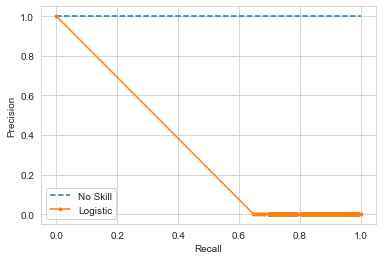

In [318]:
# yhat = grid_rf_class.best_estimator_.predict_proba(X_test)
# naive_probs = yhat[:, 1]
# # calculate the precision-recall auc
# precision, recall, _ = precision_recall_curve(y_test, naive_probs)
# auc_score = auc(recall, precision)
# print('No Skill PR AUC: %.3f' % auc_score)
# # fit a model
# model = LogisticRegression(solver='lbfgs')
# model.fit(X_res, y_res)
# yhat = model.predict_proba(X_test)
# model_probs = yhat[:, 1]
# # calculate the precision-recall auc
# precision, recall, _ = precision_recall_curve(y_test, model_probs)
# auc_score = auc(recall, precision)
# print('Logistic PR AUC: %.3f' % auc_score)
# # plot precision-recall curves
# plot_pr_curve(y_test, model_probs)

              precision    recall  f1-score   support

           0       1.00      0.14      0.25     71089
           1       0.00      0.98      0.00       113

    accuracy                           0.15     71202
   macro avg       0.50      0.56      0.13     71202
weighted avg       1.00      0.15      0.25     71202



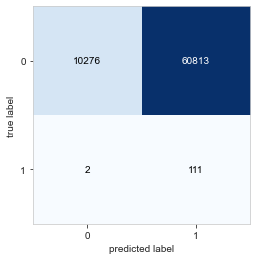

In [319]:
conf = confusion_matrix(y_test , y_pred)
plot_confusion_matrix(conf)
print(classification_report(y_test , y_pred))

In [114]:
########################################################################################################################

### RUS

In [115]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state = 42)
X_train.shape, X_test.shape

((213605, 30), (71202, 30))

In [116]:
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X_train, y_train)

In [117]:
X_res.shape, y_res.shape

((758, 30), (758, 1))

In [118]:
X_res

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,...,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,42366.0,-0.476420,0.739210,1.158568,-0.167937,0.259654,-1.654996,0.809808,-0.383876,0.125470,-0.179774,0.112208,...,-0.354521,-1.010545,-0.063103,-0.166985,-0.258007,0.220099,0.856764,-1.363639,-0.304943,0.179439,0.071724,7.99
1,39861.0,-0.237207,0.758765,1.803322,0.981746,0.189607,0.207307,0.623705,0.043835,-0.391124,0.083113,1.282183,...,-0.128225,0.542692,-0.040802,-0.051955,0.102118,-0.031632,0.190333,-0.611077,-0.529700,0.031354,-0.067608,7.40
2,36925.0,-3.715401,-1.428003,-1.243007,-3.095572,0.057070,3.670014,0.032594,1.682715,1.021129,-2.343245,-0.628047,...,0.637950,0.292166,-0.450438,-0.030866,-0.245877,-0.479757,1.116283,0.566295,-0.217899,-0.616747,-0.622073,300.00
3,37835.0,1.422925,-0.318015,-0.071801,-0.574702,-0.837736,-1.598205,-0.053578,-0.402347,-1.098248,0.700274,-0.023987,...,-1.644755,0.515544,0.024802,0.206699,0.501618,-0.118717,0.753209,0.732005,-0.104027,-0.032046,0.004473,15.00
4,34677.0,-0.377797,1.037173,1.256206,0.079828,-0.057646,-0.967535,0.738798,-0.051081,-0.328858,-0.513466,-0.297895,...,-0.070455,-0.090552,0.126393,-0.257889,-0.731220,0.036010,0.313271,-0.168108,0.073210,0.235673,0.098740,21.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
753,41194.0,-7.896886,5.381020,-8.451162,7.963928,-7.862419,-2.376820,-11.949723,5.051356,-6.912076,-11.589748,6.645201,...,-8.495299,3.453943,0.645974,2.557944,0.926278,0.032795,0.638073,0.361887,0.444577,1.101923,0.205958,1.52
754,37167.0,-7.923891,-5.198360,-3.000024,4.420666,2.272194,-3.394483,-5.283435,0.131619,0.658176,-0.794994,3.266066,...,-1.711871,3.025261,-2.169811,-0.734308,-0.599926,-4.908301,0.410170,-1.167660,0.520508,1.937421,-1.552593,12.31
755,125612.0,1.889618,1.073099,-1.678018,4.173268,1.015516,-0.009389,-0.079706,0.064071,-0.714517,0.042228,-0.408403,...,1.580758,-2.335185,-0.153570,0.203728,0.733796,-0.036560,0.334306,0.147171,0.279556,0.031669,0.035883,3.22
756,102625.0,-4.221221,2.871121,-5.888716,6.890952,-3.404894,-1.154394,-7.739928,2.851363,-2.507569,-5.110728,5.350890,...,-4.192780,0.510570,-0.227882,1.620591,1.567947,-0.578007,-0.059045,-1.829169,-0.072429,0.136734,-0.599848,7.59


In [119]:
X_res["Normalized Amount SS"] = StandardScaler().fit_transform(X_res['Amount'].values.reshape(-1, 1))
X_res.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Normalized Amount SS
0,42366.0,-0.476420,0.739210,1.158568,-0.167937,0.259654,-1.654996,0.809808,-0.383876,0.125470,-0.179774,0.112208,...,-1.010545,-0.063103,-0.166985,-0.258007,0.220099,0.856764,-1.363639,-0.304943,0.179439,0.071724,7.99,-0.426870
1,39861.0,-0.237207,0.758765,1.803322,0.981746,0.189607,0.207307,0.623705,0.043835,-0.391124,0.083113,1.282183,...,0.542692,-0.040802,-0.051955,0.102118,-0.031632,0.190333,-0.611077,-0.529700,0.031354,-0.067608,7.40,-0.429662
2,36925.0,-3.715401,-1.428003,-1.243007,-3.095572,0.057070,3.670014,0.032594,1.682715,1.021129,-2.343245,-0.628047,...,0.292166,-0.450438,-0.030866,-0.245877,-0.479757,1.116283,0.566295,-0.217899,-0.616747,-0.622073,300.00,0.955232
3,37835.0,1.422925,-0.318015,-0.071801,-0.574702,-0.837736,-1.598205,-0.053578,-0.402347,-1.098248,0.700274,-0.023987,...,0.515544,0.024802,0.206699,0.501618,-0.118717,0.753209,0.732005,-0.104027,-0.032046,0.004473,15.00,-0.393691
4,34677.0,-0.377797,1.037173,1.256206,0.079828,-0.057646,-0.967535,0.738798,-0.051081,-0.328858,-0.513466,-0.297895,...,-0.090552,0.126393,-0.257889,-0.731220,0.036010,0.313271,-0.168108,0.073210,0.235673,0.098740,21.99,-0.360607


In [120]:
X_res.drop(["Time","Amount"],axis=1,inplace=True)
X_res.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,...,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Normalized Amount SS
0,-0.476420,0.739210,1.158568,-0.167937,0.259654,-1.654996,0.809808,-0.383876,0.125470,-0.179774,0.112208,-0.106467,...,-0.354521,-1.010545,-0.063103,-0.166985,-0.258007,0.220099,0.856764,-1.363639,-0.304943,0.179439,0.071724,-0.426870
1,-0.237207,0.758765,1.803322,0.981746,0.189607,0.207307,0.623705,0.043835,-0.391124,0.083113,1.282183,0.262712,...,-0.128225,0.542692,-0.040802,-0.051955,0.102118,-0.031632,0.190333,-0.611077,-0.529700,0.031354,-0.067608,-0.429662
2,-3.715401,-1.428003,-1.243007,-3.095572,0.057070,3.670014,0.032594,1.682715,1.021129,-2.343245,-0.628047,0.645714,...,0.637950,0.292166,-0.450438,-0.030866,-0.245877,-0.479757,1.116283,0.566295,-0.217899,-0.616747,-0.622073,0.955232
3,1.422925,-0.318015,-0.071801,-0.574702,-0.837736,-1.598205,-0.053578,-0.402347,-1.098248,0.700274,-0.023987,-0.779496,...,-1.644755,0.515544,0.024802,0.206699,0.501618,-0.118717,0.753209,0.732005,-0.104027,-0.032046,0.004473,-0.393691
4,-0.377797,1.037173,1.256206,0.079828,-0.057646,-0.967535,0.738798,-0.051081,-0.328858,-0.513466,-0.297895,-0.340273,...,-0.070455,-0.090552,0.126393,-0.257889,-0.731220,0.036010,0.313271,-0.168108,0.073210,0.235673,0.098740,-0.360607


In [121]:
X_test.drop(["Time"],axis=1,inplace=True)
X_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,...,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
43428,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,-8.507059,-14.110184,5.299236,-10.834006,...,-8.398552,3.101735,-1.514923,1.190739,-1.127670,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,364.19
49906,0.339812,-2.743745,-0.134070,-1.385729,-1.451413,1.015887,-0.524379,0.224060,0.899746,-0.565012,-0.087670,0.979427,...,1.752662,0.432546,0.506044,-0.213436,-0.942525,-0.526819,-1.156992,0.311211,-0.746647,0.040996,0.102038,520.12
29474,1.399590,-0.590701,0.168619,-1.029950,-0.539806,0.040444,-0.712567,0.002299,-0.971747,0.756801,0.543827,0.112453,...,-0.533300,1.192245,0.212877,0.102398,0.168269,-0.166639,-0.810250,0.505083,-0.232340,0.011409,0.004634,31.00
276481,-0.432071,1.647895,-1.669361,-0.349504,0.785785,-0.630647,0.276990,0.586025,-0.484715,-1.376648,-1.328335,0.223621,...,0.981343,0.101264,-0.244633,0.358932,0.873663,-0.178642,-0.017171,-0.207392,-0.157756,-0.237386,0.001934,1.50
278846,2.014160,-0.137394,-1.015839,0.327269,-0.182179,-0.956571,0.043241,-0.160746,0.363241,0.259452,0.942162,0.850038,...,-0.333816,0.404711,-0.255293,-0.238644,-0.616400,0.347045,0.061561,-0.360196,0.174730,-0.078043,-0.070571,0.89


### 4- SVM

In [122]:
svm = SVC()
# mean_test_score                                      0.940649

In [123]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

In [124]:
grid_rf_class = GridSearchCV(
    estimator = svm,
    param_grid = param_grid,
    scoring = 'accuracy',
    n_jobs = 4,
    cv = 10,
    refit = True,
    return_train_score = True
)

In [125]:
grid_rf_class.fit(X_res,y_res)

GridSearchCV(cv=10, estimator=SVC(), n_jobs=4,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             return_train_score=True, scoring='accuracy')

In [126]:
grid_rf_class.predict(X_test)

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [127]:
cv_results_df = pd.DataFrame(grid_rf_class.cv_results_)

In [128]:
cv_results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.083896,0.032379,0.087412,0.119350,0.1,1,rbf,"{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}",0.552632,0.565789,0.565789,0.539474,...,1.000000,1.000000,1.000000,0.995601,0.997067,0.998534,0.997067,0.998534,0.500732,0.500732,0.898827,0.199052
1,0.034164,0.017468,0.004960,0.005999,0.1,1,poly,"{'C': 0.1, 'gamma': 1, 'kernel': 'poly'}",0.921053,0.947368,0.855263,0.894737,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
2,0.036441,0.019210,0.003822,0.006250,0.1,1,sigmoid,"{'C': 0.1, 'gamma': 1, 'kernel': 'sigmoid'}",0.815789,0.763158,0.789474,0.723684,...,0.736070,0.762463,0.736070,0.737537,0.744868,0.774194,0.743402,0.724340,0.754026,0.729136,0.744211,0.014590
3,0.075417,0.023052,0.017714,0.016333,0.1,0.1,rbf,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}",0.815789,0.855263,0.697368,0.776316,...,0.768328,0.755132,0.775660,0.760997,0.777126,0.777126,0.771261,0.772727,0.775988,0.780381,0.771473,0.007546
4,0.031487,0.013165,0.003126,0.006251,0.1,0.1,poly,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}",0.934211,0.947368,0.881579,0.947368,...,0.978006,0.975073,0.979472,0.976540,0.973607,0.978006,0.973607,0.975073,0.978038,0.973646,0.976107,0.002077
5,0.021870,0.007653,0.000000,0.000000,0.1,0.1,sigmoid,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'sigmoid'}",0.723684,0.776316,0.697368,0.776316,...,0.775660,0.772727,0.787390,0.775660,0.768328,0.778592,0.774194,0.765396,0.775988,0.789165,0.776310,0.007031
6,0.032613,0.012444,0.030705,0.043581,0.1,0.01,rbf,"{'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}",0.907895,0.934211,0.868421,0.947368,...,0.923754,0.922287,0.931085,0.923754,0.926686,0.922287,0.922287,0.928152,0.928258,0.918009,0.924656,0.003651
7,0.019898,0.011888,0.011435,0.009560,0.1,0.01,poly,"{'C': 0.1, 'gamma': 0.01, 'kernel': 'poly'}",0.921053,0.881579,0.842105,0.921053,...,0.910557,0.912023,0.919355,0.910557,0.910557,0.914956,0.910557,0.912023,0.909224,0.912152,0.912196,0.002802
8,0.026849,0.010519,0.003057,0.004765,0.1,0.01,sigmoid,"{'C': 0.1, 'gamma': 0.01, 'kernel': 'sigmoid'}",0.842105,0.907895,0.802632,0.868421,...,0.890029,0.876833,0.895894,0.881232,0.881232,0.879765,0.881232,0.878299,0.879941,0.884334,0.882879,0.005538
9,0.027685,0.008638,0.075155,0.072318,0.1,0.001,rbf,"{'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}",0.934211,0.894737,0.868421,0.921053,...,0.904692,0.909091,0.913490,0.906158,0.907625,0.912023,0.904692,0.907625,0.907760,0.904832,0.907799,0.002877


In [129]:
cv_results_df.sort_values(by="rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
30,0.031951,0.015137,0.007182,0.010253,10,0.01,rbf,"{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}",0.947368,0.934211,0.881579,0.960526,...,0.973607,0.969208,0.979472,0.967742,0.973607,0.975073,0.970674,0.969208,0.975110,0.970717,0.972442,0.003395
43,0.024032,0.013665,0.006151,0.010036,100,0.01,poly,"{'C': 100, 'gamma': 0.01, 'kernel': 'poly'}",0.934211,0.947368,0.881579,0.947368,...,0.978006,0.975073,0.979472,0.976540,0.973607,0.978006,0.973607,0.975073,0.978038,0.973646,0.976107,0.002077
4,0.031487,0.013165,0.003126,0.006251,0.1,0.1,poly,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}",0.934211,0.947368,0.881579,0.947368,...,0.978006,0.975073,0.979472,0.976540,0.973607,0.978006,0.973607,0.975073,0.978038,0.973646,0.976107,0.002077
45,0.024843,0.018628,0.012235,0.005485,100,0.001,rbf,"{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}",0.934211,0.934211,0.894737,0.934211,...,0.956012,0.956012,0.963343,0.956012,0.956012,0.957478,0.953079,0.951613,0.957540,0.953148,0.956025,0.003072
31,0.032805,0.014737,0.004687,0.007159,10,0.01,poly,"{'C': 10, 'gamma': 0.01, 'kernel': 'poly'}",0.921053,0.934211,0.868421,0.934211,...,0.950147,0.951613,0.954545,0.953079,0.954545,0.951613,0.947214,0.945748,0.953148,0.950220,0.951187,0.002788
18,0.027826,0.006142,0.009047,0.006092,1,0.01,rbf,"{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}",0.934211,0.934211,0.894737,0.934211,...,0.945748,0.945748,0.951613,0.945748,0.947214,0.947214,0.941349,0.944282,0.948755,0.944363,0.946203,0.002628
42,0.028629,0.014217,0.039227,0.034207,100,0.01,rbf,"{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}",0.934211,0.947368,0.828947,0.934211,...,0.998534,0.995601,0.997067,0.998534,0.998534,0.997067,0.998534,0.995601,0.998536,0.995608,0.997362,0.001278
33,0.021794,0.018772,0.009615,0.011924,10,0.001,rbf,"{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}",0.907895,0.934211,0.868421,0.934211,...,0.939883,0.938416,0.942815,0.941349,0.942815,0.941349,0.938416,0.939883,0.941435,0.935578,0.940194,0.002139
19,0.026682,0.018695,0.007835,0.010536,1,0.01,poly,"{'C': 1, 'gamma': 0.01, 'kernel': 'poly'}",0.921053,0.934211,0.868421,0.921053,...,0.935484,0.935484,0.941349,0.934018,0.935484,0.935484,0.932551,0.936950,0.935578,0.931186,0.935357,0.002562
21,0.015993,0.007074,0.007812,0.007812,1,0.001,rbf,"{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}",0.934211,0.934211,0.881579,0.921053,...,0.928152,0.925220,0.935484,0.929619,0.929619,0.928152,0.922287,0.931085,0.929722,0.925329,0.928467,0.003451


In [130]:
best_row = cv_results_df[cv_results_df['rank_test_score'] == 1]
print(best_row.T)

                                                           30
mean_fit_time                                        0.031951
std_fit_time                                         0.015137
mean_score_time                                      0.007182
std_score_time                                       0.010253
param_C                                                    10
param_gamma                                              0.01
param_kernel                                              rbf
params              {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
split0_test_score                                    0.947368
split1_test_score                                    0.934211
split2_test_score                                    0.881579
split3_test_score                                    0.960526
split4_test_score                                    0.947368
split5_test_score                                    0.894737
split6_test_score                                    0.973684
split7_t

In [131]:
print(grid_rf_class.best_estimator_)

SVC(C=10, gamma=0.01)


In [132]:
svm = grid_rf_class.best_estimator_

              precision    recall  f1-score   support

           0       1.00      0.14      0.25     71089
           1       0.00      0.98      0.00       113

    accuracy                           0.15     71202
   macro avg       0.50      0.56      0.13     71202
weighted avg       1.00      0.15      0.25     71202



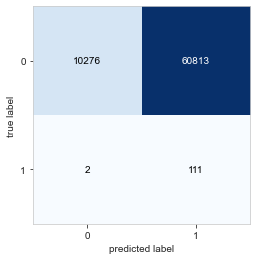

In [133]:
conf = confusion_matrix(y_test , y_pred)
plot_confusion_matrix(conf)
print(classification_report(y_test , y_pred))

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
roc_auc

In [134]:
#############################################################################################################

### RUS

In [199]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state = 42)
X_train.shape, X_test.shape

((1,), (1,))

In [136]:
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X_train, y_train)

In [137]:
X_res.shape, y_res.shape

((758, 30), (758, 1))

In [138]:
X_res

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,...,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,42366.0,-0.476420,0.739210,1.158568,-0.167937,0.259654,-1.654996,0.809808,-0.383876,0.125470,-0.179774,0.112208,...,-0.354521,-1.010545,-0.063103,-0.166985,-0.258007,0.220099,0.856764,-1.363639,-0.304943,0.179439,0.071724,7.99
1,39861.0,-0.237207,0.758765,1.803322,0.981746,0.189607,0.207307,0.623705,0.043835,-0.391124,0.083113,1.282183,...,-0.128225,0.542692,-0.040802,-0.051955,0.102118,-0.031632,0.190333,-0.611077,-0.529700,0.031354,-0.067608,7.40
2,36925.0,-3.715401,-1.428003,-1.243007,-3.095572,0.057070,3.670014,0.032594,1.682715,1.021129,-2.343245,-0.628047,...,0.637950,0.292166,-0.450438,-0.030866,-0.245877,-0.479757,1.116283,0.566295,-0.217899,-0.616747,-0.622073,300.00
3,37835.0,1.422925,-0.318015,-0.071801,-0.574702,-0.837736,-1.598205,-0.053578,-0.402347,-1.098248,0.700274,-0.023987,...,-1.644755,0.515544,0.024802,0.206699,0.501618,-0.118717,0.753209,0.732005,-0.104027,-0.032046,0.004473,15.00
4,34677.0,-0.377797,1.037173,1.256206,0.079828,-0.057646,-0.967535,0.738798,-0.051081,-0.328858,-0.513466,-0.297895,...,-0.070455,-0.090552,0.126393,-0.257889,-0.731220,0.036010,0.313271,-0.168108,0.073210,0.235673,0.098740,21.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
753,41194.0,-7.896886,5.381020,-8.451162,7.963928,-7.862419,-2.376820,-11.949723,5.051356,-6.912076,-11.589748,6.645201,...,-8.495299,3.453943,0.645974,2.557944,0.926278,0.032795,0.638073,0.361887,0.444577,1.101923,0.205958,1.52
754,37167.0,-7.923891,-5.198360,-3.000024,4.420666,2.272194,-3.394483,-5.283435,0.131619,0.658176,-0.794994,3.266066,...,-1.711871,3.025261,-2.169811,-0.734308,-0.599926,-4.908301,0.410170,-1.167660,0.520508,1.937421,-1.552593,12.31
755,125612.0,1.889618,1.073099,-1.678018,4.173268,1.015516,-0.009389,-0.079706,0.064071,-0.714517,0.042228,-0.408403,...,1.580758,-2.335185,-0.153570,0.203728,0.733796,-0.036560,0.334306,0.147171,0.279556,0.031669,0.035883,3.22
756,102625.0,-4.221221,2.871121,-5.888716,6.890952,-3.404894,-1.154394,-7.739928,2.851363,-2.507569,-5.110728,5.350890,...,-4.192780,0.510570,-0.227882,1.620591,1.567947,-0.578007,-0.059045,-1.829169,-0.072429,0.136734,-0.599848,7.59


In [139]:
X_res["Normalized Amount SS"] = StandardScaler().fit_transform(X_res['Amount'].values.reshape(-1, 1))
X_res.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Normalized Amount SS
0,42366.0,-0.476420,0.739210,1.158568,-0.167937,0.259654,-1.654996,0.809808,-0.383876,0.125470,-0.179774,0.112208,...,-1.010545,-0.063103,-0.166985,-0.258007,0.220099,0.856764,-1.363639,-0.304943,0.179439,0.071724,7.99,-0.426870
1,39861.0,-0.237207,0.758765,1.803322,0.981746,0.189607,0.207307,0.623705,0.043835,-0.391124,0.083113,1.282183,...,0.542692,-0.040802,-0.051955,0.102118,-0.031632,0.190333,-0.611077,-0.529700,0.031354,-0.067608,7.40,-0.429662
2,36925.0,-3.715401,-1.428003,-1.243007,-3.095572,0.057070,3.670014,0.032594,1.682715,1.021129,-2.343245,-0.628047,...,0.292166,-0.450438,-0.030866,-0.245877,-0.479757,1.116283,0.566295,-0.217899,-0.616747,-0.622073,300.00,0.955232
3,37835.0,1.422925,-0.318015,-0.071801,-0.574702,-0.837736,-1.598205,-0.053578,-0.402347,-1.098248,0.700274,-0.023987,...,0.515544,0.024802,0.206699,0.501618,-0.118717,0.753209,0.732005,-0.104027,-0.032046,0.004473,15.00,-0.393691
4,34677.0,-0.377797,1.037173,1.256206,0.079828,-0.057646,-0.967535,0.738798,-0.051081,-0.328858,-0.513466,-0.297895,...,-0.090552,0.126393,-0.257889,-0.731220,0.036010,0.313271,-0.168108,0.073210,0.235673,0.098740,21.99,-0.360607


In [140]:
X_res.drop(["Time","Amount"],axis=1,inplace=True)
X_res.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,...,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Normalized Amount SS
0,-0.476420,0.739210,1.158568,-0.167937,0.259654,-1.654996,0.809808,-0.383876,0.125470,-0.179774,0.112208,-0.106467,...,-0.354521,-1.010545,-0.063103,-0.166985,-0.258007,0.220099,0.856764,-1.363639,-0.304943,0.179439,0.071724,-0.426870
1,-0.237207,0.758765,1.803322,0.981746,0.189607,0.207307,0.623705,0.043835,-0.391124,0.083113,1.282183,0.262712,...,-0.128225,0.542692,-0.040802,-0.051955,0.102118,-0.031632,0.190333,-0.611077,-0.529700,0.031354,-0.067608,-0.429662
2,-3.715401,-1.428003,-1.243007,-3.095572,0.057070,3.670014,0.032594,1.682715,1.021129,-2.343245,-0.628047,0.645714,...,0.637950,0.292166,-0.450438,-0.030866,-0.245877,-0.479757,1.116283,0.566295,-0.217899,-0.616747,-0.622073,0.955232
3,1.422925,-0.318015,-0.071801,-0.574702,-0.837736,-1.598205,-0.053578,-0.402347,-1.098248,0.700274,-0.023987,-0.779496,...,-1.644755,0.515544,0.024802,0.206699,0.501618,-0.118717,0.753209,0.732005,-0.104027,-0.032046,0.004473,-0.393691
4,-0.377797,1.037173,1.256206,0.079828,-0.057646,-0.967535,0.738798,-0.051081,-0.328858,-0.513466,-0.297895,-0.340273,...,-0.070455,-0.090552,0.126393,-0.257889,-0.731220,0.036010,0.313271,-0.168108,0.073210,0.235673,0.098740,-0.360607


In [141]:
X_test.drop(["Time"],axis=1,inplace=True)
X_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,...,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
43428,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,-8.507059,-14.110184,5.299236,-10.834006,...,-8.398552,3.101735,-1.514923,1.190739,-1.127670,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,364.19
49906,0.339812,-2.743745,-0.134070,-1.385729,-1.451413,1.015887,-0.524379,0.224060,0.899746,-0.565012,-0.087670,0.979427,...,1.752662,0.432546,0.506044,-0.213436,-0.942525,-0.526819,-1.156992,0.311211,-0.746647,0.040996,0.102038,520.12
29474,1.399590,-0.590701,0.168619,-1.029950,-0.539806,0.040444,-0.712567,0.002299,-0.971747,0.756801,0.543827,0.112453,...,-0.533300,1.192245,0.212877,0.102398,0.168269,-0.166639,-0.810250,0.505083,-0.232340,0.011409,0.004634,31.00
276481,-0.432071,1.647895,-1.669361,-0.349504,0.785785,-0.630647,0.276990,0.586025,-0.484715,-1.376648,-1.328335,0.223621,...,0.981343,0.101264,-0.244633,0.358932,0.873663,-0.178642,-0.017171,-0.207392,-0.157756,-0.237386,0.001934,1.50
278846,2.014160,-0.137394,-1.015839,0.327269,-0.182179,-0.956571,0.043241,-0.160746,0.363241,0.259452,0.942162,0.850038,...,-0.333816,0.404711,-0.255293,-0.238644,-0.616400,0.347045,0.061561,-0.360196,0.174730,-0.078043,-0.070571,0.89


### 5- K-NN

In [142]:
knn = KNeighborsClassifier()

In [143]:
param_grid = {'n_neighbors': [5,10,15,20,25,50]} 

In [144]:
grid_rf_class = GridSearchCV(
    estimator = knn,
    param_grid = param_grid,
    scoring = 'accuracy',
    n_jobs = 4,
    cv = 10,
    refit = True,
    return_train_score = True
)

In [145]:
grid_rf_class.fit(X_res,y_res)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=4,
             param_grid={'n_neighbors': [5, 10, 15, 20, 25, 50]},
             return_train_score=True, scoring='accuracy')

In [146]:
grid_rf_class.predict(X_test)

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [147]:
cv_results_df = pd.DataFrame(grid_rf_class.cv_results_)

In [148]:
cv_results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,...,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.008078,0.002420,0.015061,0.004875,5,{'n_neighbors': 5},0.947368,0.934211,0.868421,0.921053,0.947368,0.894737,...,0.947214,0.947214,0.953079,0.948680,0.942815,0.951613,0.948680,0.948680,0.947291,0.945827,0.948110,0.002710
1,0.006648,0.003704,0.011203,0.002273,10,{'n_neighbors': 10},0.934211,0.921053,0.881579,0.921053,0.934211,0.921053,...,0.934018,0.936950,0.935484,0.929619,0.934018,0.934018,0.926686,0.934018,0.932650,0.925329,0.932279,0.003619
2,0.003690,0.003027,0.012187,0.003675,15,{'n_neighbors': 15},0.934211,0.934211,0.868421,0.921053,0.934211,0.921053,...,0.931085,0.934018,0.938416,0.931085,0.931085,0.932551,0.926686,0.934018,0.929722,0.926794,0.931546,0.003326
3,0.005884,0.001442,0.009774,0.000869,20,{'n_neighbors': 20},0.934211,0.934211,0.868421,0.921053,0.934211,0.921053,...,0.928152,0.931085,0.938416,0.931085,0.932551,0.929619,0.926686,0.931085,0.929722,0.926794,0.930520,0.003211
4,0.005585,0.000489,0.010273,0.001097,25,{'n_neighbors': 25},0.934211,0.934211,0.868421,0.921053,0.921053,0.921053,...,0.929619,0.932551,0.936950,0.931085,0.932551,0.929619,0.926686,0.931085,0.929722,0.925329,0.930520,0.003068
5,0.006981,0.002562,0.011171,0.002266,50,{'n_neighbors': 50},0.934211,0.921053,0.881579,0.921053,0.907895,0.921053,...,0.926686,0.928152,0.931085,0.928152,0.929619,0.928152,0.920821,0.928152,0.925329,0.919473,0.926562,0.003531


In [149]:
cv_results_df.sort_values(by="rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,...,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
1,0.006648,0.003704,0.011203,0.002273,10,{'n_neighbors': 10},0.934211,0.921053,0.881579,0.921053,0.934211,0.921053,...,0.934018,0.936950,0.935484,0.929619,0.934018,0.934018,0.926686,0.934018,0.932650,0.925329,0.932279,0.003619
3,0.005884,0.001442,0.009774,0.000869,20,{'n_neighbors': 20},0.934211,0.934211,0.868421,0.921053,0.934211,0.921053,...,0.928152,0.931085,0.938416,0.931085,0.932551,0.929619,0.926686,0.931085,0.929722,0.926794,0.930520,0.003211
2,0.003690,0.003027,0.012187,0.003675,15,{'n_neighbors': 15},0.934211,0.934211,0.868421,0.921053,0.934211,0.921053,...,0.931085,0.934018,0.938416,0.931085,0.931085,0.932551,0.926686,0.934018,0.929722,0.926794,0.931546,0.003326
4,0.005585,0.000489,0.010273,0.001097,25,{'n_neighbors': 25},0.934211,0.934211,0.868421,0.921053,0.921053,0.921053,...,0.929619,0.932551,0.936950,0.931085,0.932551,0.929619,0.926686,0.931085,0.929722,0.925329,0.930520,0.003068
5,0.006981,0.002562,0.011171,0.002266,50,{'n_neighbors': 50},0.934211,0.921053,0.881579,0.921053,0.907895,0.921053,...,0.926686,0.928152,0.931085,0.928152,0.929619,0.928152,0.920821,0.928152,0.925329,0.919473,0.926562,0.003531
0,0.008078,0.002420,0.015061,0.004875,5,{'n_neighbors': 5},0.947368,0.934211,0.868421,0.921053,0.947368,0.894737,...,0.947214,0.947214,0.953079,0.948680,0.942815,0.951613,0.948680,0.948680,0.947291,0.945827,0.948110,0.002710


In [150]:
best_row = cv_results_df[cv_results_df['rank_test_score'] == 1]
print(best_row.T)

                                      1
mean_fit_time                  0.006648
std_fit_time                   0.003704
mean_score_time                0.011203
std_score_time                 0.002273
param_n_neighbors                    10
params              {'n_neighbors': 10}
split0_test_score              0.934211
split1_test_score              0.921053
split2_test_score              0.881579
split3_test_score              0.921053
split4_test_score              0.934211
split5_test_score              0.921053
split6_test_score              0.986842
split7_test_score              0.934211
split8_test_score              0.906667
split9_test_score              0.973333
mean_test_score                0.931421
std_test_score                 0.028759
rank_test_score                       1
split0_train_score             0.934018
split1_train_score              0.93695
split2_train_score             0.935484
split3_train_score             0.929619
split4_train_score             0.934018


In [151]:
print(grid_rf_class.best_estimator_)

KNeighborsClassifier(n_neighbors=10)


In [152]:
knn = grid_rf_class.best_estimator_

              precision    recall  f1-score   support

           0       1.00      0.14      0.25     71089
           1       0.00      0.98      0.00       113

    accuracy                           0.15     71202
   macro avg       0.50      0.56      0.13     71202
weighted avg       1.00      0.15      0.25     71202



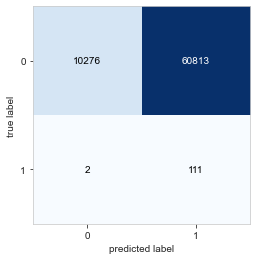

In [153]:
conf = confusion_matrix(y_test , y_pred)
plot_confusion_matrix(conf)
print(classification_report(y_test , y_pred))

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
roc_auc

In [154]:
##########################################################################################################################

In [155]:
##########################################################################################################################

##### I realised that the highest accuracies are those calculated by Random Forest, XGBOOST and SVM. But, SVM takes longer time to tune its various hyperparameters so I am only going to try Random Forest and XGBOOST with the Oversampled Data

#### 2- Random Oversampling (ROS)

In [320]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state = 42)
X_train.shape, X_test.shape

((213605, 30), (71202, 30))

In [321]:
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X_train, y_train)

In [322]:
X_res.shape, y_res.shape

((426452, 30), (426452, 1))

In [323]:
X_res

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,...,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,59741.0,-1.648591,1.228130,1.370169,-1.735542,-0.029455,-0.484129,0.918645,-0.438750,0.982144,1.241635,1.105624,...,0.184568,-0.331603,0.384201,-0.218076,-0.203458,-0.213015,0.011372,-0.304481,0.632063,-0.262968,-0.099863,38.42
1,45648.0,-0.234775,-0.493269,1.236728,-2.338793,-1.176733,0.885733,-1.960981,-2.363412,-2.694774,0.360215,1.615495,...,-0.577032,-1.635634,0.364679,-1.495358,-0.083066,0.074612,-0.347329,0.541900,-0.433294,0.089293,0.212029,61.20
2,31579.0,1.134626,-0.774460,-0.163390,-0.533358,-0.604555,-0.244482,-0.212682,0.040782,-1.136627,0.792009,0.961637,...,0.796223,-0.519459,-0.396476,-0.684454,-1.855269,0.171997,-0.387783,-0.062985,0.245118,-0.061178,0.012180,110.95
3,80455.0,0.069514,1.017753,1.033117,1.384376,0.223233,-0.310845,0.597287,-0.127658,-0.701533,0.070739,-0.857263,...,0.371960,1.561447,0.148760,0.097023,0.369957,-0.219266,-0.124941,-0.049749,-0.112946,0.114440,0.066101,10.00
4,39302.0,-0.199441,0.610092,-0.114437,0.256565,2.290752,4.008475,-0.123530,1.038374,-0.075846,0.030453,-0.756030,...,0.355749,1.375281,0.292972,-0.019733,0.165463,-0.080978,1.020656,-0.300730,-0.269595,0.481769,0.254114,22.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426447,149582.0,-4.280584,1.421100,-3.908229,2.942946,-0.076205,-2.002526,-2.874155,-0.856005,0.963674,-3.235439,3.341802,...,-3.921722,0.685511,-0.198963,-0.140062,-0.907720,-0.680108,-0.349170,0.056276,-1.149923,-1.809886,0.723051,1.10
426448,102625.0,-4.221221,2.871121,-5.888716,6.890952,-3.404894,-1.154394,-7.739928,2.851363,-2.507569,-5.110728,5.350890,...,-4.192780,0.510570,-0.227882,1.620591,1.567947,-0.578007,-0.059045,-1.829169,-0.072429,0.136734,-0.599848,7.59
426449,21419.0,-17.467710,10.114816,-24.202142,11.805469,-10.198046,-2.579938,-17.656788,2.256902,-6.242149,-12.830657,9.442665,...,-4.721370,0.550519,1.001519,-2.328024,0.940830,1.296817,-1.055104,0.111792,0.679695,2.093541,-1.425491,1.00
426450,94625.0,1.707857,0.024881,-0.488140,3.787548,1.139451,2.914673,-0.743358,0.699136,1.008471,0.912806,0.765354,...,-0.755786,-1.912563,-0.368014,0.010865,0.548258,0.091218,-1.007959,-0.082183,0.179709,0.007738,-0.068841,33.76


In [324]:
X_res["Normalized Amount SS"] = StandardScaler().fit_transform(X_res['Amount'].values.reshape(-1, 1))
X_res.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Normalized Amount SS
0,59741.0,-1.648591,1.228130,1.370169,-1.735542,-0.029455,-0.484129,0.918645,-0.438750,0.982144,1.241635,1.105624,...,-0.331603,0.384201,-0.218076,-0.203458,-0.213015,0.011372,-0.304481,0.632063,-0.262968,-0.099863,38.42,-0.248728
1,45648.0,-0.234775,-0.493269,1.236728,-2.338793,-1.176733,0.885733,-1.960981,-2.363412,-2.694774,0.360215,1.615495,...,-1.635634,0.364679,-1.495358,-0.083066,0.074612,-0.347329,0.541900,-0.433294,0.089293,0.212029,61.20,-0.157460
2,31579.0,1.134626,-0.774460,-0.163390,-0.533358,-0.604555,-0.244482,-0.212682,0.040782,-1.136627,0.792009,0.961637,...,-0.519459,-0.396476,-0.684454,-1.855269,0.171997,-0.387783,-0.062985,0.245118,-0.061178,0.012180,110.95,0.041865
3,80455.0,0.069514,1.017753,1.033117,1.384376,0.223233,-0.310845,0.597287,-0.127658,-0.701533,0.070739,-0.857263,...,1.561447,0.148760,0.097023,0.369957,-0.219266,-0.124941,-0.049749,-0.112946,0.114440,0.066101,10.00,-0.362594
4,39302.0,-0.199441,0.610092,-0.114437,0.256565,2.290752,4.008475,-0.123530,1.038374,-0.075846,0.030453,-0.756030,...,1.375281,0.292972,-0.019733,0.165463,-0.080978,1.020656,-0.300730,-0.269595,0.481769,0.254114,22.00,-0.314515


In [325]:
X_res.drop(["Time","Amount"],axis=1,inplace=True)
X_res.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,...,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Normalized Amount SS
0,-1.648591,1.228130,1.370169,-1.735542,-0.029455,-0.484129,0.918645,-0.438750,0.982144,1.241635,1.105624,0.058367,...,0.184568,-0.331603,0.384201,-0.218076,-0.203458,-0.213015,0.011372,-0.304481,0.632063,-0.262968,-0.099863,-0.248728
1,-0.234775,-0.493269,1.236728,-2.338793,-1.176733,0.885733,-1.960981,-2.363412,-2.694774,0.360215,1.615495,0.447752,...,-0.577032,-1.635634,0.364679,-1.495358,-0.083066,0.074612,-0.347329,0.541900,-0.433294,0.089293,0.212029,-0.157460
2,1.134626,-0.774460,-0.163390,-0.533358,-0.604555,-0.244482,-0.212682,0.040782,-1.136627,0.792009,0.961637,-0.140033,...,0.796223,-0.519459,-0.396476,-0.684454,-1.855269,0.171997,-0.387783,-0.062985,0.245118,-0.061178,0.012180,0.041865
3,0.069514,1.017753,1.033117,1.384376,0.223233,-0.310845,0.597287,-0.127658,-0.701533,0.070739,-0.857263,-0.290899,...,0.371960,1.561447,0.148760,0.097023,0.369957,-0.219266,-0.124941,-0.049749,-0.112946,0.114440,0.066101,-0.362594
4,-0.199441,0.610092,-0.114437,0.256565,2.290752,4.008475,-0.123530,1.038374,-0.075846,0.030453,-0.756030,-0.045165,...,0.355749,1.375281,0.292972,-0.019733,0.165463,-0.080978,1.020656,-0.300730,-0.269595,0.481769,0.254114,-0.314515


In [326]:
X_test.drop(["Time"],axis=1,inplace=True)
X_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,...,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
43428,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,-8.507059,-14.110184,5.299236,-10.834006,...,-8.398552,3.101735,-1.514923,1.190739,-1.127670,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,364.19
49906,0.339812,-2.743745,-0.134070,-1.385729,-1.451413,1.015887,-0.524379,0.224060,0.899746,-0.565012,-0.087670,0.979427,...,1.752662,0.432546,0.506044,-0.213436,-0.942525,-0.526819,-1.156992,0.311211,-0.746647,0.040996,0.102038,520.12
29474,1.399590,-0.590701,0.168619,-1.029950,-0.539806,0.040444,-0.712567,0.002299,-0.971747,0.756801,0.543827,0.112453,...,-0.533300,1.192245,0.212877,0.102398,0.168269,-0.166639,-0.810250,0.505083,-0.232340,0.011409,0.004634,31.00
276481,-0.432071,1.647895,-1.669361,-0.349504,0.785785,-0.630647,0.276990,0.586025,-0.484715,-1.376648,-1.328335,0.223621,...,0.981343,0.101264,-0.244633,0.358932,0.873663,-0.178642,-0.017171,-0.207392,-0.157756,-0.237386,0.001934,1.50
278846,2.014160,-0.137394,-1.015839,0.327269,-0.182179,-0.956571,0.043241,-0.160746,0.363241,0.259452,0.942162,0.850038,...,-0.333816,0.404711,-0.255293,-0.238644,-0.616400,0.347045,0.061561,-0.360196,0.174730,-0.078043,-0.070571,0.89


### Modeling With Oversampled Data

### 1- XGBOOST

In [327]:
xgb = XGBClassifier()
# learning_rate = 0.3, max_depth = 12 / 15, n_estimators = 100,  mean_test_score     0.941982 

In [328]:
param_grid = {'learning_rate': [0.3,1], 'n_estimators': [50,100], 'max_depth': [15,25]} 

In [329]:
grid_rf_class = GridSearchCV(
    estimator = xgb,
    param_grid = param_grid,
    scoring = 'accuracy',
    n_jobs = 4,
    cv = 5,
    refit = True,
    return_train_score = True
)

In [330]:
grid_rf_class.fit(X_res,y_res)

[20:56:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight

In [331]:
grid_rf_class.predict(X_test)

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [332]:
cv_results_df = pd.DataFrame(grid_rf_class.cv_results_)

In [333]:
cv_results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,179.133908,2.127296,0.448202,0.213677,0.3,15,50,"{'learning_rate': 0.3, 'max_depth': 15, 'n_est...",0.999941,0.999941,0.999930,0.999941,0.999906,0.999932,0.000014,2,1.0,0.999997,1.0,1.0,1.0,0.999999,0.000001
1,247.994582,6.354777,1.276189,1.987528,0.3,15,100,"{'learning_rate': 0.3, 'max_depth': 15, 'n_est...",0.999953,0.999953,0.999930,0.999930,0.999906,0.999934,0.000018,1,1.0,1.000000,1.0,1.0,1.0,1.000000,0.000000
2,190.052141,3.518205,0.217220,0.025353,0.3,25,50,"{'learning_rate': 0.3, 'max_depth': 25, 'n_est...",0.999953,0.999930,0.999906,0.999930,0.999906,0.999925,0.000018,5,1.0,0.999997,1.0,1.0,1.0,0.999999,0.000001
3,274.559961,3.949963,0.265685,0.045974,0.3,25,100,"{'learning_rate': 0.3, 'max_depth': 25, 'n_est...",0.999953,0.999941,0.999918,0.999953,0.999894,0.999932,0.000023,3,1.0,1.000000,1.0,1.0,1.0,1.000000,0.000000
4,96.652635,2.108240,0.156581,0.026568,1,15,50,"{'learning_rate': 1, 'max_depth': 15, 'n_estim...",0.999930,0.999953,0.999918,0.999906,0.999894,0.999920,0.000020,8,1.0,1.000000,1.0,1.0,1.0,1.000000,0.000000
5,131.481502,3.456545,0.249931,0.042767,1,15,100,"{'learning_rate': 1, 'max_depth': 15, 'n_estim...",0.999930,0.999953,0.999918,0.999918,0.999906,0.999925,0.000016,5,1.0,1.000000,1.0,1.0,1.0,1.000000,0.000000
6,96.678941,1.913930,0.226994,0.019055,1,25,50,"{'learning_rate': 1, 'max_depth': 25, 'n_estim...",0.999953,0.999906,0.999930,0.999930,0.999894,0.999923,0.000020,7,1.0,1.000000,1.0,1.0,1.0,1.000000,0.000000
7,342.266707,420.990328,0.212489,0.087943,1,25,100,"{'learning_rate': 1, 'max_depth': 25, 'n_estim...",0.999953,0.999918,0.999941,0.999930,0.999894,0.999927,0.000020,4,1.0,1.000000,1.0,1.0,1.0,1.000000,0.000000


In [334]:
cv_results_df.sort_values(by="rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
1,247.994582,6.354777,1.276189,1.987528,0.3,15,100,"{'learning_rate': 0.3, 'max_depth': 15, 'n_est...",0.999953,0.999953,0.999930,0.999930,0.999906,0.999934,0.000018,1,1.0,1.000000,1.0,1.0,1.0,1.000000,0.000000
0,179.133908,2.127296,0.448202,0.213677,0.3,15,50,"{'learning_rate': 0.3, 'max_depth': 15, 'n_est...",0.999941,0.999941,0.999930,0.999941,0.999906,0.999932,0.000014,2,1.0,0.999997,1.0,1.0,1.0,0.999999,0.000001
3,274.559961,3.949963,0.265685,0.045974,0.3,25,100,"{'learning_rate': 0.3, 'max_depth': 25, 'n_est...",0.999953,0.999941,0.999918,0.999953,0.999894,0.999932,0.000023,3,1.0,1.000000,1.0,1.0,1.0,1.000000,0.000000
7,342.266707,420.990328,0.212489,0.087943,1,25,100,"{'learning_rate': 1, 'max_depth': 25, 'n_estim...",0.999953,0.999918,0.999941,0.999930,0.999894,0.999927,0.000020,4,1.0,1.000000,1.0,1.0,1.0,1.000000,0.000000
2,190.052141,3.518205,0.217220,0.025353,0.3,25,50,"{'learning_rate': 0.3, 'max_depth': 25, 'n_est...",0.999953,0.999930,0.999906,0.999930,0.999906,0.999925,0.000018,5,1.0,0.999997,1.0,1.0,1.0,0.999999,0.000001
5,131.481502,3.456545,0.249931,0.042767,1,15,100,"{'learning_rate': 1, 'max_depth': 15, 'n_estim...",0.999930,0.999953,0.999918,0.999918,0.999906,0.999925,0.000016,5,1.0,1.000000,1.0,1.0,1.0,1.000000,0.000000
6,96.678941,1.913930,0.226994,0.019055,1,25,50,"{'learning_rate': 1, 'max_depth': 25, 'n_estim...",0.999953,0.999906,0.999930,0.999930,0.999894,0.999923,0.000020,7,1.0,1.000000,1.0,1.0,1.0,1.000000,0.000000
4,96.652635,2.108240,0.156581,0.026568,1,15,50,"{'learning_rate': 1, 'max_depth': 15, 'n_estim...",0.999930,0.999953,0.999918,0.999906,0.999894,0.999920,0.000020,8,1.0,1.000000,1.0,1.0,1.0,1.000000,0.000000


In [335]:
best_row = cv_results_df[cv_results_df['rank_test_score'] == 1]
print(best_row.T)

                                                                     1
mean_fit_time                                               247.994582
std_fit_time                                                  6.354777
mean_score_time                                               1.276189
std_score_time                                                1.987528
param_learning_rate                                                0.3
param_max_depth                                                     15
param_n_estimators                                                 100
params               {'learning_rate': 0.3, 'max_depth': 15, 'n_est...
split0_test_score                                             0.999953
split1_test_score                                             0.999953
split2_test_score                                              0.99993
split3_test_score                                              0.99993
split4_test_score                                             0.999906
mean_t

In [336]:
print(grid_rf_class.best_estimator_)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.3, max_delta_step=0,
              max_depth=15, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [337]:
xgb = grid_rf_class.best_estimator_

In [338]:
featimp = pd.Series(xgb.feature_importances_,index=X_res.columns).sort_values(ascending=False)
print(featimp)
# this is the property of  classifier that it provide us the importance of the features use

V14                     0.609228
V4                      0.063627
V8                      0.043853
V12                     0.036803
V7                      0.028120
V27                     0.021009
V22                     0.020516
V23                     0.017165
V6                      0.016982
V17                     0.016637
Normalized Amount SS    0.012977
V9                      0.012328
V18                     0.010860
V3                      0.010219
V15                     0.009889
V10                     0.008924
V19                     0.008809
V25                     0.008507
V20                     0.006087
V1                      0.005429
V11                     0.004940
V5                      0.004601
V21                     0.004555
V26                     0.004387
V16                     0.003477
V28                     0.003018
V13                     0.002969
V24                     0.002474
V2                      0.001612
dtype: float32


              precision    recall  f1-score   support

           0       1.00      0.14      0.25     71089
           1       0.00      0.98      0.00       113

    accuracy                           0.15     71202
   macro avg       0.50      0.56      0.13     71202
weighted avg       1.00      0.15      0.25     71202



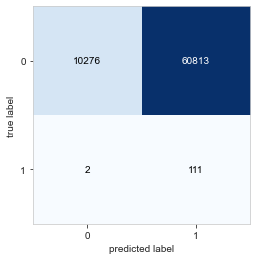

In [339]:
conf = confusion_matrix(y_test , y_pred)
plot_confusion_matrix(conf)
print(classification_report(y_test , y_pred))

No Skill PR AUC: 0.860
Logistic PR AUC: 0.395


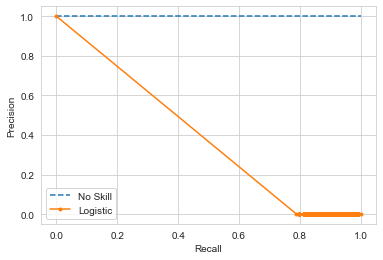

In [340]:
# yhat = grid_rf_class.best_estimator_.predict_proba(X_test)
# naive_probs = yhat[:, 1]
# # calculate the precision-recall auc
# precision, recall, _ = precision_recall_curve(y_test, naive_probs)
# auc_score = auc(recall, precision)
# print('No Skill PR AUC: %.3f' % auc_score)
# # fit a model
# model = LogisticRegression(solver='lbfgs')
# model.fit(X_res, y_res)
# yhat = model.predict_proba(X_test)
# model_probs = yhat[:, 1]
# # calculate the precision-recall auc
# precision, recall, _ = precision_recall_curve(y_test, model_probs)
# auc_score = auc(recall, precision)
# print('Logistic PR AUC: %.3f' % auc_score)
# # plot precision-recall curves
# plot_pr_curve(y_test, model_probs)

### ROS

In [341]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state = 42)
X_train.shape, X_test.shape

((213605, 30), (71202, 30))

In [342]:
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X_train, y_train)

In [343]:
X_res.shape, y_res.shape

((426452, 30), (426452, 1))

In [344]:
X_res

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,...,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,59741.0,-1.648591,1.228130,1.370169,-1.735542,-0.029455,-0.484129,0.918645,-0.438750,0.982144,1.241635,1.105624,...,0.184568,-0.331603,0.384201,-0.218076,-0.203458,-0.213015,0.011372,-0.304481,0.632063,-0.262968,-0.099863,38.42
1,45648.0,-0.234775,-0.493269,1.236728,-2.338793,-1.176733,0.885733,-1.960981,-2.363412,-2.694774,0.360215,1.615495,...,-0.577032,-1.635634,0.364679,-1.495358,-0.083066,0.074612,-0.347329,0.541900,-0.433294,0.089293,0.212029,61.20
2,31579.0,1.134626,-0.774460,-0.163390,-0.533358,-0.604555,-0.244482,-0.212682,0.040782,-1.136627,0.792009,0.961637,...,0.796223,-0.519459,-0.396476,-0.684454,-1.855269,0.171997,-0.387783,-0.062985,0.245118,-0.061178,0.012180,110.95
3,80455.0,0.069514,1.017753,1.033117,1.384376,0.223233,-0.310845,0.597287,-0.127658,-0.701533,0.070739,-0.857263,...,0.371960,1.561447,0.148760,0.097023,0.369957,-0.219266,-0.124941,-0.049749,-0.112946,0.114440,0.066101,10.00
4,39302.0,-0.199441,0.610092,-0.114437,0.256565,2.290752,4.008475,-0.123530,1.038374,-0.075846,0.030453,-0.756030,...,0.355749,1.375281,0.292972,-0.019733,0.165463,-0.080978,1.020656,-0.300730,-0.269595,0.481769,0.254114,22.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426447,149582.0,-4.280584,1.421100,-3.908229,2.942946,-0.076205,-2.002526,-2.874155,-0.856005,0.963674,-3.235439,3.341802,...,-3.921722,0.685511,-0.198963,-0.140062,-0.907720,-0.680108,-0.349170,0.056276,-1.149923,-1.809886,0.723051,1.10
426448,102625.0,-4.221221,2.871121,-5.888716,6.890952,-3.404894,-1.154394,-7.739928,2.851363,-2.507569,-5.110728,5.350890,...,-4.192780,0.510570,-0.227882,1.620591,1.567947,-0.578007,-0.059045,-1.829169,-0.072429,0.136734,-0.599848,7.59
426449,21419.0,-17.467710,10.114816,-24.202142,11.805469,-10.198046,-2.579938,-17.656788,2.256902,-6.242149,-12.830657,9.442665,...,-4.721370,0.550519,1.001519,-2.328024,0.940830,1.296817,-1.055104,0.111792,0.679695,2.093541,-1.425491,1.00
426450,94625.0,1.707857,0.024881,-0.488140,3.787548,1.139451,2.914673,-0.743358,0.699136,1.008471,0.912806,0.765354,...,-0.755786,-1.912563,-0.368014,0.010865,0.548258,0.091218,-1.007959,-0.082183,0.179709,0.007738,-0.068841,33.76


In [345]:
X_res["Normalized Amount SS"] = StandardScaler().fit_transform(X_res['Amount'].values.reshape(-1, 1))
X_res.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Normalized Amount SS
0,59741.0,-1.648591,1.228130,1.370169,-1.735542,-0.029455,-0.484129,0.918645,-0.438750,0.982144,1.241635,1.105624,...,-0.331603,0.384201,-0.218076,-0.203458,-0.213015,0.011372,-0.304481,0.632063,-0.262968,-0.099863,38.42,-0.248728
1,45648.0,-0.234775,-0.493269,1.236728,-2.338793,-1.176733,0.885733,-1.960981,-2.363412,-2.694774,0.360215,1.615495,...,-1.635634,0.364679,-1.495358,-0.083066,0.074612,-0.347329,0.541900,-0.433294,0.089293,0.212029,61.20,-0.157460
2,31579.0,1.134626,-0.774460,-0.163390,-0.533358,-0.604555,-0.244482,-0.212682,0.040782,-1.136627,0.792009,0.961637,...,-0.519459,-0.396476,-0.684454,-1.855269,0.171997,-0.387783,-0.062985,0.245118,-0.061178,0.012180,110.95,0.041865
3,80455.0,0.069514,1.017753,1.033117,1.384376,0.223233,-0.310845,0.597287,-0.127658,-0.701533,0.070739,-0.857263,...,1.561447,0.148760,0.097023,0.369957,-0.219266,-0.124941,-0.049749,-0.112946,0.114440,0.066101,10.00,-0.362594
4,39302.0,-0.199441,0.610092,-0.114437,0.256565,2.290752,4.008475,-0.123530,1.038374,-0.075846,0.030453,-0.756030,...,1.375281,0.292972,-0.019733,0.165463,-0.080978,1.020656,-0.300730,-0.269595,0.481769,0.254114,22.00,-0.314515


In [346]:
X_res.drop(["Time","Amount"],axis=1,inplace=True)
X_res.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,...,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Normalized Amount SS
0,-1.648591,1.228130,1.370169,-1.735542,-0.029455,-0.484129,0.918645,-0.438750,0.982144,1.241635,1.105624,0.058367,...,0.184568,-0.331603,0.384201,-0.218076,-0.203458,-0.213015,0.011372,-0.304481,0.632063,-0.262968,-0.099863,-0.248728
1,-0.234775,-0.493269,1.236728,-2.338793,-1.176733,0.885733,-1.960981,-2.363412,-2.694774,0.360215,1.615495,0.447752,...,-0.577032,-1.635634,0.364679,-1.495358,-0.083066,0.074612,-0.347329,0.541900,-0.433294,0.089293,0.212029,-0.157460
2,1.134626,-0.774460,-0.163390,-0.533358,-0.604555,-0.244482,-0.212682,0.040782,-1.136627,0.792009,0.961637,-0.140033,...,0.796223,-0.519459,-0.396476,-0.684454,-1.855269,0.171997,-0.387783,-0.062985,0.245118,-0.061178,0.012180,0.041865
3,0.069514,1.017753,1.033117,1.384376,0.223233,-0.310845,0.597287,-0.127658,-0.701533,0.070739,-0.857263,-0.290899,...,0.371960,1.561447,0.148760,0.097023,0.369957,-0.219266,-0.124941,-0.049749,-0.112946,0.114440,0.066101,-0.362594
4,-0.199441,0.610092,-0.114437,0.256565,2.290752,4.008475,-0.123530,1.038374,-0.075846,0.030453,-0.756030,-0.045165,...,0.355749,1.375281,0.292972,-0.019733,0.165463,-0.080978,1.020656,-0.300730,-0.269595,0.481769,0.254114,-0.314515


In [347]:
X_test.drop(["Time"],axis=1,inplace=True)
X_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,...,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
43428,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,-8.507059,-14.110184,5.299236,-10.834006,...,-8.398552,3.101735,-1.514923,1.190739,-1.127670,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,364.19
49906,0.339812,-2.743745,-0.134070,-1.385729,-1.451413,1.015887,-0.524379,0.224060,0.899746,-0.565012,-0.087670,0.979427,...,1.752662,0.432546,0.506044,-0.213436,-0.942525,-0.526819,-1.156992,0.311211,-0.746647,0.040996,0.102038,520.12
29474,1.399590,-0.590701,0.168619,-1.029950,-0.539806,0.040444,-0.712567,0.002299,-0.971747,0.756801,0.543827,0.112453,...,-0.533300,1.192245,0.212877,0.102398,0.168269,-0.166639,-0.810250,0.505083,-0.232340,0.011409,0.004634,31.00
276481,-0.432071,1.647895,-1.669361,-0.349504,0.785785,-0.630647,0.276990,0.586025,-0.484715,-1.376648,-1.328335,0.223621,...,0.981343,0.101264,-0.244633,0.358932,0.873663,-0.178642,-0.017171,-0.207392,-0.157756,-0.237386,0.001934,1.50
278846,2.014160,-0.137394,-1.015839,0.327269,-0.182179,-0.956571,0.043241,-0.160746,0.363241,0.259452,0.942162,0.850038,...,-0.333816,0.404711,-0.255293,-0.238644,-0.616400,0.347045,0.061561,-0.360196,0.174730,-0.078043,-0.070571,0.89


### 2- Random Forest

In [348]:
param_grid = {'max_depth':[26], 'max_features': [7], 'n_estimators' : [12]}
# After trying different combinations this was the best I found so far
# So, we have a winner!

In [349]:
rf_class = RandomForestClassifier()

In [350]:
grid_rf_class = GridSearchCV(
    estimator = rf_class,
    param_grid = param_grid,
    scoring = 'accuracy',
    n_jobs = 4,
    cv = 10,
    refit = True,
    return_train_score = True
)

In [351]:
grid_rf_class.fit(X_res,y_res)

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'max_depth': [26], 'max_features': [7],
                         'n_estimators': [12]},
             return_train_score=True, scoring='accuracy')

In [352]:
y_pred = grid_rf_class.predict(X_test)

In [353]:
cv_results_df = pd.DataFrame(grid_rf_class.cv_results_)

In [354]:
cv_results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,57.086686,9.000487,0.186402,0.145723,26,7,12,"{'max_depth': 26, 'max_features': 7, 'n_estima...",0.999977,0.999953,0.999977,0.999953,...,0.999995,0.999997,1.0,0.999997,1.0,1.0,0.999997,0.999995,0.999997,1.0,0.999998,0.000002


In [355]:
cv_results_df.sort_values(by="rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,57.086686,9.000487,0.186402,0.145723,26,7,12,"{'max_depth': 26, 'max_features': 7, 'n_estima...",0.999977,0.999953,0.999977,0.999953,...,0.999995,0.999997,1.0,0.999997,1.0,1.0,0.999997,0.999995,0.999997,1.0,0.999998,0.000002


In [356]:
best_row = cv_results_df[cv_results_df['rank_test_score'] == 1]
print(best_row.T)

                                                                    0
mean_fit_time                                               57.086686
std_fit_time                                                 9.000487
mean_score_time                                              0.186402
std_score_time                                               0.145723
param_max_depth                                                    26
param_max_features                                                  7
param_n_estimators                                                 12
params              {'max_depth': 26, 'max_features': 7, 'n_estima...
split0_test_score                                            0.999977
split1_test_score                                            0.999953
split2_test_score                                            0.999977
split3_test_score                                            0.999953
split4_test_score                                            0.999906
split5_test_score   

In [357]:
rfc = grid_rf_class.best_estimator_
rfc

RandomForestClassifier(max_depth=26, max_features=7, n_estimators=12)

In [358]:
featimp = pd.Series(rfc.feature_importances_,index=X_res.columns).sort_values(ascending=False)
print(featimp) # this is the property of Random Forest classifier that it provide us the importance 
# of the features use

V14                     0.287480
V4                      0.163276
V12                     0.139658
V17                     0.079875
V10                     0.067650
V16                     0.053083
V2                      0.038314
V3                      0.013772
V8                      0.013308
Normalized Amount SS    0.011731
V26                     0.011633
V7                      0.010385
V19                     0.009972
V5                      0.009878
V15                     0.009618
V11                     0.008322
V18                     0.007406
V20                     0.007337
V1                      0.007311
V6                      0.007229
V21                     0.006855
V13                     0.006117
V24                     0.006093
V25                     0.005072
V9                      0.004081
V23                     0.004023
V28                     0.003862
V22                     0.003860
V27                     0.002799
dtype: float64


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71089
           1       0.94      0.73      0.83       113

    accuracy                           1.00     71202
   macro avg       0.97      0.87      0.91     71202
weighted avg       1.00      1.00      1.00     71202



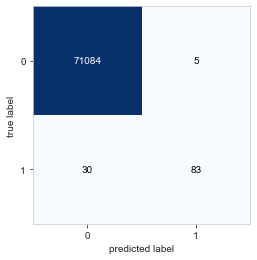

In [359]:
conf = confusion_matrix(y_test , y_pred)
plot_confusion_matrix(conf)
print(classification_report(y_test , y_pred))

In [362]:
fi = data[['V14','V4','V12','V17','V10','V16','V2']]

In [363]:
fi.head()

,V14,V4,V12,V17,V10,V16,V2
0,-0.311169,1.378155,-0.617801,0.207971,0.090794,-0.470401,-0.072781
1,-0.143772,0.448154,1.065235,-0.114805,-0.166974,0.463917,0.266151
2,-0.165946,0.379780,0.066084,1.109969,0.207643,-2.890083,-1.340163
3,-0.287924,-0.863291,0.178228,-0.684093,-0.054952,-1.059647,-0.185226
4,-1.119670,0.403034,0.538196,-0.237033,0.753074,-0.451449,0.877737


In [364]:
X_train, X_test, y_train, y_test = train_test_split(fi, y, test_size=0.25, random_state = 42)
X_train.shape, X_test.shape

((213605, 7), (71202, 7))

In [365]:
grid_rf_class.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'max_depth': [26], 'max_features': [7],
                         'n_estimators': [12]},
             return_train_score=True, scoring='accuracy')

In [366]:
y_pred = grid_rf_class.predict(X_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71089
           1       0.89      0.75      0.82       113

    accuracy                           1.00     71202
   macro avg       0.95      0.88      0.91     71202
weighted avg       1.00      1.00      1.00     71202



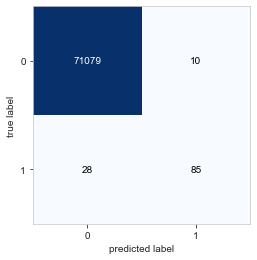

In [367]:
conf = confusion_matrix(y_test , y_pred)
plot_confusion_matrix(conf)
print(classification_report(y_test , y_pred))

No Skill PR AUC: 0.816
Logistic PR AUC: 0.395


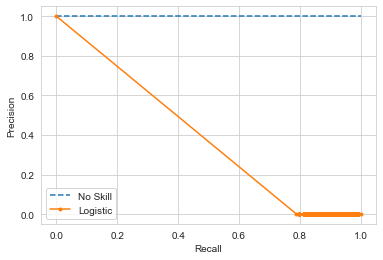

In [360]:
# yhat = grid_rf_class.best_estimator_.predict_proba(X_test)
# naive_probs = yhat[:, 1]
# # calculate the precision-recall auc
# precision, recall, _ = precision_recall_curve(y_test, naive_probs)
# auc_score = auc(recall, precision)
# print('No Skill PR AUC: %.3f' % auc_score)
# # fit a model
# model = LogisticRegression(solver='lbfgs')
# model.fit(X_res, y_res)
# yhat = model.predict_proba(X_test)
# model_probs = yhat[:, 1]
# # calculate the precision-recall auc
# precision, recall, _ = precision_recall_curve(y_test, model_probs)
# auc_score = auc(recall, precision)
# print('Logistic PR AUC: %.3f' % auc_score)
# # plot precision-recall curves
# plot_pr_curve(y_test, model_probs)

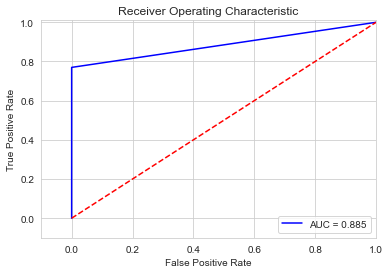

0.8849346519015115

In [265]:
# fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# roc_auc = auc(fpr,tpr)

# # Plot ROC
# plt.title('Receiver Operating Characteristic')
# plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
# plt.legend(loc='lower right')
# plt.plot([0,1],[0,1],'r--')
# plt.xlim([-0.1,1.0])
# plt.ylim([-0.1,1.01])
# plt.ylabel('True Positive Rate')
# plt.xlabel('False Positive Rate')
# plt.show()
# roc_auc

In [241]:
##########################################################################################################################

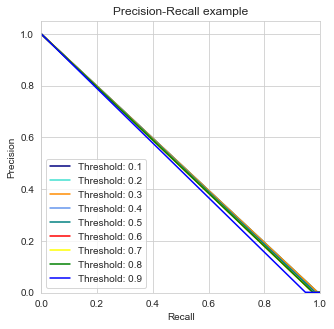

In [242]:
# from itertools import cycle

# lr = LogisticRegression(C = 0.01, penalty = 'l2')
# lr.fit(X_res,y_res.values.ravel())
# y_pred_undersample_proba = lr.predict_proba(X_test.values)

# thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
# colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal', 'red', 'yellow', 'green', 'blue','black'])

# plt.figure(figsize=(5,5))

# j = 1
# for i,color in zip(thresholds,colors):
#     y_test_predictions_prob = y_pred_undersample_proba[:,1] > i
    
#     precision, recall, thresholds = precision_recall_curve(y_test,y_test_predictions_prob)
    
#     # Plot Precision-Recall curve
#     plt.plot(recall, precision, color=color,
#                  label='Threshold: %s'%i)
#     plt.xlabel('Recall')
#     plt.ylabel('Precision')
#     plt.ylim([0.0, 1.05])
#     plt.xlim([0.0, 1.0])
#     plt.title('Precision-Recall example')
#     plt.legend(loc="lower left")

In [243]:
##########################################################################################################################